### 1) Cargar librerias

Se importan las librerias relevantes para el análisis exploratorio

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 2) Cargar dataset

Se carga la base de datos extraída de SAP

In [ ]:
# Ruta al archivo con el histórico de ventas
ruta = "/content/"
ventas = "Base ventas historicas tanques (1).xlsx"

# Cargar las hojas de Excel en DataFrames
hoja0 = pd.read_excel(ruta + ventas, sheet_name='2019')
hoja1 = pd.read_excel(ruta + ventas, sheet_name='2020')
hoja2 = pd.read_excel(ruta + ventas, sheet_name='2021')
hoja3 = pd.read_excel(ruta + ventas, sheet_name='2022')
hoja4 = pd.read_excel(ruta + ventas, sheet_name='2023')
hoja5 = pd.read_excel(ruta + ventas, sheet_name='2024')


### 3) Exploración de los datos

In [ ]:
# Revisar columnas de cada hoja
print("Columnas ventas 2019:", hoja0.columns)
print("Columnas ventas 2020:", hoja1.columns)
print("Columnas ventas 2021:", hoja2.columns)
print("Columnas ventas 2022:", hoja3.columns)
print("Columnas ventas 2023:", hoja4.columns)
print("Columnas ventas 2024:", hoja5.columns)


Columnas ventas 2019: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES', 'VENTAS NETAS KILOS',
       'VENTAS NETAS PESOS', 'CIUDAD'],
      dtype='object')
Columnas ventas 2020: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES', 'VENTAS NETAS KILOS',
       'VENTAS NETAS PESOS', 'CIUDAD'],
      dtype='object')
Columnas ventas 2021: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'VENTAS NETAS UNIDADES', 'VENTAS NETAS KILOS',
       'VENTAS NETAS PESOS', 'CIUDAD'],
      dtype='object')
Columnas ventas 2022: Index(['Fecha', 'BODEGA MOVIMIENTO', 'DESCRIPCION', 'CODIGO SAP',
       'NOMBRE ITEM SAP', 'CIUDAD', 'VENTAS NETAS UNIDADES',
       'VENTAS NETAS KILOS', 'VENTAS NETAS PESOS'],
      dtype='object')
Columnas ventas 2023: Index(['Fecha', 'BODEGA MOVIMIENTO', 'NIT SAP', 'CODIGO SAP',
       'NOMBRE ITEM SAP'

In [ ]:
# Desde el 2022 se empezo a agregar el campo ciudad, así que agregamos el campo "CIUDAD" vacio a las hojas de 2021 hacia atras
hoja0['CIUDAD'] = np.nan
hoja1['CIUDAD'] = np.nan
hoja2['CIUDAD'] = np.nan

In [ ]:
# Seleccionar las columnas deseadas de cada hoja
columnas_deseadas = ['Fecha', 'CODIGO SAP', 'NOMBRE ITEM SAP', 'BODEGA MOVIMIENTO', 'CIUDAD', 'VENTAS NETAS UNIDADES']
#columnas_deseadas = ['Fecha', 'CODIGO SAP', 'NOMBRE ITEM SAP', 'BODEGA MOVIMIENTO', 'CIUDAD', 'VENTAS NETAS UNIDADES','VENTAS NETAS KILOS','VENTAS NETAS PESOS']

# Combinar las hojas en una sola conservando solo las columnas deseadas
ventas = pd.concat([hoja0[columnas_deseadas], hoja1[columnas_deseadas], hoja2[columnas_deseadas], hoja3[columnas_deseadas], hoja4[columnas_deseadas], hoja5[columnas_deseadas]], ignore_index=True)

# Ordenar el DataFrame resultante por la columna 'Fecha'
ventas = ventas.sort_values(by='Fecha')

# Muestreame el nuevo data frame
ventas.head()

,Fecha,CODIGO SAP,NOMBRE ITEM SAP,BODEGA MOVIMIENTO,CIUDAD,VENTAS NETAS UNIDADES
3155,2019-01-08,T1005028451,JUEGO TANQUE TOPTEC 500 L,PRODUCTO TERMINADO,NaN,1
197,2019-01-08,T1005028410,JUEGO TANQUE TOPTEC 1000 L,PRODUCTO TERMINADO,NaN,25
1896,2019-01-08,T1005028410,JUEGO TANQUE TOPTEC 1000 L,PRODUCTO TERMINADO,NaN,4
421,2019-01-09,T1005028420,JUEGO TANQUE TOPTEC 2000 L,BOD SATEL TOPTEC BQLLA,NaN,8
1297,2019-01-09,T1005028410,JUEGO TANQUE TOPTEC 1000 L,PRODUCTO TERMINADO,NaN,6


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34336 entries, 3155 to 32151
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  34336 non-null  datetime64[ns]
 1   CODIGO SAP             34336 non-null  object        
 2   NOMBRE ITEM SAP        34336 non-null  object        
 3   BODEGA MOVIMIENTO      34336 non-null  object        
 4   CIUDAD                 22254 non-null  object        
 5   VENTAS NETAS UNIDADES  34336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


#### Analicemos las columnas cuantitativas

In [ ]:
ventas.describe()

,Fecha,VENTAS NETAS UNIDADES
count,34336,34336.000000
mean,2022-04-02 13:55:45.013979392,9.350885
min,2019-01-08 00:00:00,-238.000000
25%,2021-04-09 00:00:00,1.000000
50%,2022-07-15 00:00:00,5.000000
75%,2023-05-24 00:00:00,13.000000
max,2024-02-29 00:00:00,805.000000
std,NaN,20.309946


No podemos tener ventas negativas, así que descartamos los registros con valores negativos

In [ ]:
ventas = ventas.loc[ventas['VENTAS NETAS UNIDADES'] > 0]
#ventas = ventas.loc[(ventas['VENTAS NETAS UNIDADES'] > 0) & (ventas['VENTAS NETAS KILOS'] > 0) & (ventas['VENTAS NETAS PESOS'] > 0)]

In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29982 entries, 3155 to 32151
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  29982 non-null  datetime64[ns]
 1   CODIGO SAP             29982 non-null  object        
 2   NOMBRE ITEM SAP        29982 non-null  object        
 3   BODEGA MOVIMIENTO      29982 non-null  object        
 4   CIUDAD                 18333 non-null  object        
 5   VENTAS NETAS UNIDADES  29982 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# Resetear los indices del dataframe
ventas = ventas.reset_index(drop=True)
ventas.head()

,Fecha,CODIGO SAP,NOMBRE ITEM SAP,BODEGA MOVIMIENTO,CIUDAD,VENTAS NETAS UNIDADES
0,2019-01-08,T1005028451,JUEGO TANQUE TOPTEC 500 L,PRODUCTO TERMINADO,NaN,1
1,2019-01-08,T1005028410,JUEGO TANQUE TOPTEC 1000 L,PRODUCTO TERMINADO,NaN,25
2,2019-01-08,T1005028410,JUEGO TANQUE TOPTEC 1000 L,PRODUCTO TERMINADO,NaN,4
3,2019-01-09,T1005028420,JUEGO TANQUE TOPTEC 2000 L,BOD SATEL TOPTEC BQLLA,NaN,8
4,2019-01-09,T1005028410,JUEGO TANQUE TOPTEC 1000 L,PRODUCTO TERMINADO,NaN,6


#### Analicemos las columnas cualitativas

Primero se aplicaran correcciones tipicas que son convertir todo a mayúsculas y eliminar errores de digitación con espacios

In [ ]:
# Identificar columnas cualitativas (de tipo object o category)
columnas_cualitativas = ventas.select_dtypes(include=['object', 'category']).columns

# Convertir a mayúsculas solo esas columnas
ventas[columnas_cualitativas] = ventas[columnas_cualitativas].apply(lambda x: x.str.upper())

# Aplicar str.strip() para eliminar espacios en blanco al inicio y al final de cada valor
ventas[columnas_cualitativas] = ventas[columnas_cualitativas].apply(lambda x: x.str.strip())

# Reemplazar múltiples espacios por uno solo en cada columna cualitativa
ventas[columnas_cualitativas] = ventas[columnas_cualitativas].apply(lambda x: x.str.replace(r'\s+', ' ', regex=True))

In [ ]:
nombres_items = ventas['NOMBRE ITEM SAP'].value_counts()
nombres_items

,count
NOMBRE ITEM SAP,
JUEGO TANQUE TOPTEC 1000 L,2883
JUEGO TANQUE TOPTEC 500 L,2412
JUEGO TANQUE TOPTEC 2000 L,2022
TAPA TANQUE TOPTEC 1000 L,1894
TANQUE TOPTEC 1000 L,1560
...,...
KIT JUEGO TANQUE 250 L AZUL (TANQUE 250L + TAPA),1
CABALLETE PVC P7,1
VENTANA EN CALADO 0.61 X 1.00,1


Como se tienen 144 productos diferentes se exportará a un CSV para revisarlos detenidamente en Excel

In [ ]:
# Convertir a DataFrame y exportar a CSV
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items.csv', index=False)

Se identifican las siguientes inconsistencias:

- Algunos productos en su nombre tienen "TANQ" en vez de "TANQUE"
- Algunos productos en su nombre tienen "LTS" o "LT" en vez de "L"
- Algunos productos en su nombre tienen la capacidad seguido de la unidades (ej: 2000L, 6MM) y otros con un espacio de entre la capacidad y la unidad (ej: 1000 L, 6 MM)
- Unos productos tiene la palabra "JUEG0" con la letra "O" como un cero "0".
- Unos productos tiene la palabra "JUEGOTANQUE", es necesario separarla.
- Unificar nombre entre "JUEGO TANQUE TOPTEC AZUL BOTELLA 1100L" y "JUEGO TANQUE TOPTEC AZUL TIPO BOTELL 1100 LTS"
- Eliminar la notación del color del producto en el nombre
- Eliminar la palabra "NUEVO" en el nombre


In [ ]:
# Se crea un nuevo DataFrame para realizar las correcciones
ventas_corregido = ventas

Notese que el tanque negro, nuevo y sin referencia es lo mismo, el azul si es diferente

In [ ]:
ventas_corregido['NOMBRE ITEM SAP'] = (
    ventas_corregido['NOMBRE ITEM SAP']
    .str.replace(r'\bTANQ\b', 'TANQUE', regex=True)  # Cambiar "TANQ" por "TANQUE"
    .str.replace(r'\bLTS\b', 'L', regex=True)  # Cambiar "LTS" por "L"
    .str.replace(r'\bLT\b', 'L', regex=True)  # Cambiar "LTS" por "L"
    .str.replace(r'(\d+)L\b', r'\1 L', regex=True)  # Asegurar formato "<CAPACIDAD> L"
    .str.replace(r'(\d+)MM\b', r'\1 MM', regex=True)  # Asegurar formato "<LONGITUD> MM"
    .str.replace(r'\bJUEG0\b', 'JUEGO', regex=True)  # Cambiar "JUEG0" (con cero) por "JUEGO"
    .str.replace('JUEGOTANQUE', 'JUEGO TANQUE')  # Asegurar espacio entre "JUEGO" y "TANQUE"
    .str.replace('TIPO BOTELL', 'BOTELLA')  # Cambiar "TIPO BOTELL" por "BOTELLA"
    .str.replace(' NEGRO', '')  # Eliminar la referencia de color negro
    .str.replace(' NUEVO', '')  # Eliminar la palabra nuevo
    .str.replace('+TAPA ', '+ TAPA ')  # Eliminar la palabra nuevo
    .str.replace(' TAPA+', ' TAPA +')  # Eliminar la palabra nuevo
)

Volvemos a analizar los nombres de los productos posterior a sus correcciones

In [ ]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido.csv', index=False)

In [ ]:
nombres_items

,count
NOMBRE ITEM SAP,
JUEGO TANQUE TOPTEC 1000 L,2883
JUEGO TANQUE TOPTEC 500 L,2412
JUEGO TANQUE TOPTEC 2000 L,2022
TAPA TANQUE TOPTEC 1000 L,1918
TANQUE TOPTEC 1000 L,1584
...,...
KIT JUEGO TANQUE 250 L AZUL (TANQUE 250 L + TAPA),1
VENTANA EN CALADO 0.61 X 0.61,1
VENTANA EN CALADO 0.61 X 1.00,1


Como aún contamos con 100 nombres de productos diferentes y para algunos se tienen muy pocos registros, vamos a revisar los productos diferentes a tanques, que son el principal producto para observar como ha sido el comportamientos de estos productos "secundarios" a lo largo del tiempo

In [ ]:
list_nombres_items = nombres_items.index.tolist()
list_nombres_items

['JUEGO TANQUE TOPTEC 1000 L',
 'JUEGO TANQUE TOPTEC 500 L',
 'JUEGO TANQUE TOPTEC 2000 L',
 'TAPA TANQUE TOPTEC 1000 L',
 'TANQUE TOPTEC 1000 L',
 'TAPA TANQUE TOPTEC 500 L',
 'TANQUE TOPTEC 500 L',
 'TAPA TANQUE TOPTEC 2000 L',
 'TANQUE TOPTEC 2000 L',
 'JUEGO TANQUE TOPTEC 250 L',
 'TAPA TANQUE TOPTEC 250 L',
 'KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )',
 'KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )',
 'TANQUE PLASTICO TOPTEC 2000 L',
 'KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )',
 'KIT JUEGO TANQUE TOPTEC 1000 L',
 'TANQUE TOPTEC 250 L',
 'TRAMPA DE GRASAS 250 L',
 'KIT JUEGO TANQUE TOPTEC 500 L',
 'JUEGO TANQUE TOPTEC AZUL BOTELLA 1100 L',
 'TANQUE PLASTICO TOPTEC 1000 L',
 'TANQUE SEPTICO 1000 L',
 'TAPA TOPTEC BOTELLA 1100 L AZUL',
 'TANQUE TOPTEC BOTELLA 1100 L AZUL',
 'KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )',
 'TANQUE PLASTICO TOPTEC 500 L',
 'FILTRO ANAEROBICO 1000 L',


In [ ]:
productos_secundarios = []
for item in list_nombres_items:
    if not "TANQUE" in item:
        productos_secundarios.append(item)

print("Se tienen %s productos diferentes a tanques"%len(productos_secundarios))
productos_secundarios.sort()
print(productos_secundarios)

Se tienen 49 productos diferentes a tanques
['ARMECOLOR 1.00 X 2.44 ROJO', 'CABALLETE PVC P7', 'CRUCETA DISTRIBUCION 1000 L', 'CRUCETA DISTRIBUCION 2000 L', 'CRUCETA DISTRIBUCION 500 L', 'FALSO FONDO 1000 L', 'FALSO FONDO 2000 L', 'FALSO FONDO 500 L', 'FILTRO ANAEROBICO 1000 L', 'FILTRO ANAEROBICO 2000 L', 'FILTRO ANAEROBICO 500 L', 'KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)', 'KIT FILTRO ANAEROBICO DE 2000 L (FILTRO ANAEROBICO Y TAPA)', 'KIT FILTRO ANAEROBICO DE 500 L (FILTRO ANAEROBICO Y TAPA)', 'KIT SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA', 'KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA', 'KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES', 'KIT TRAMPA DE GRASAS DE 250 L (TRAMPA DE GRASAS Y TAPA)', 'L PC ALVEO 2,10X11,60X6 MM CRIS', 'L PC ALVEO 2,10X11,60X6 MM OPAL', 'L PC ALVEO 2,10X5,90X10 MM BRON', 'LAMINA POLIC ALVEOLAR 6 MM AZUL', 'METROS GOMA SUPER', 'P. ALUMINIO 6MTSX5CMS SUPER', 'PALA CUADRADA 4303-23 CABO LARGO -TOMSON', 'PALA CUADRADA 4303-43 CABO LARG

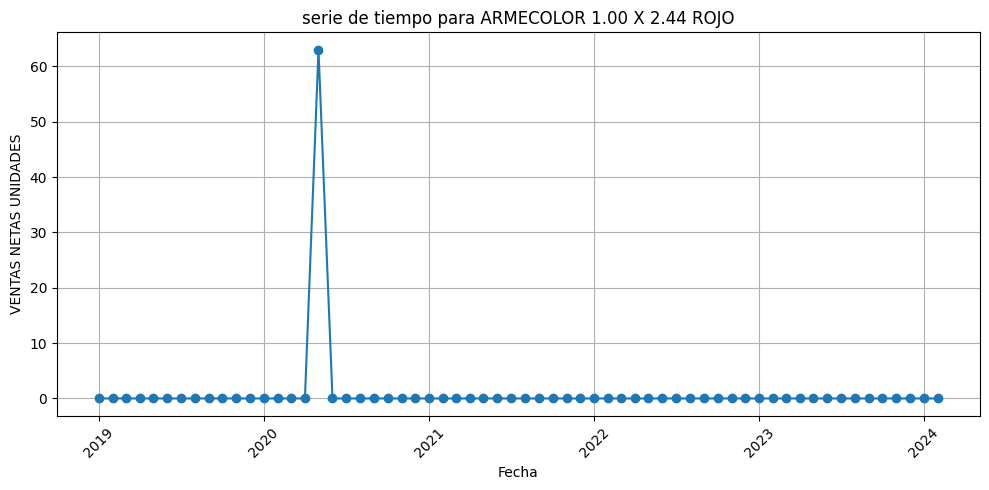

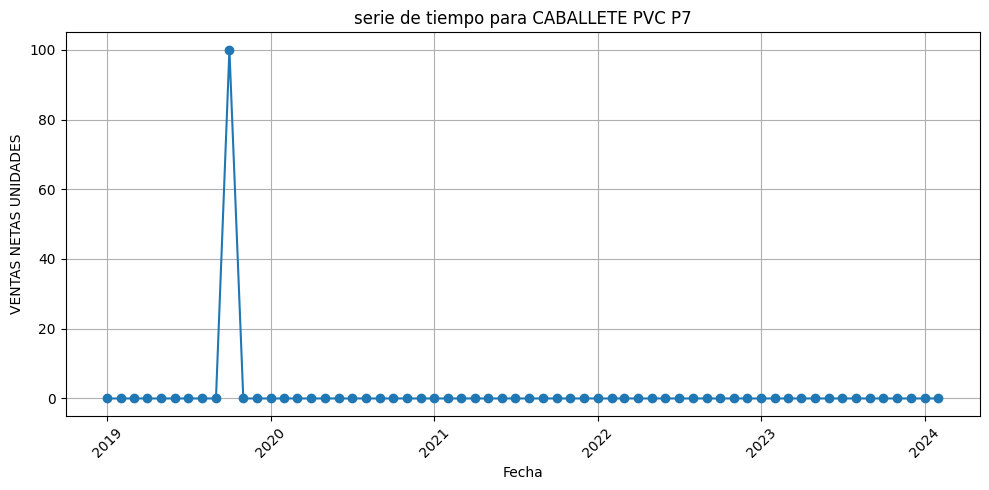

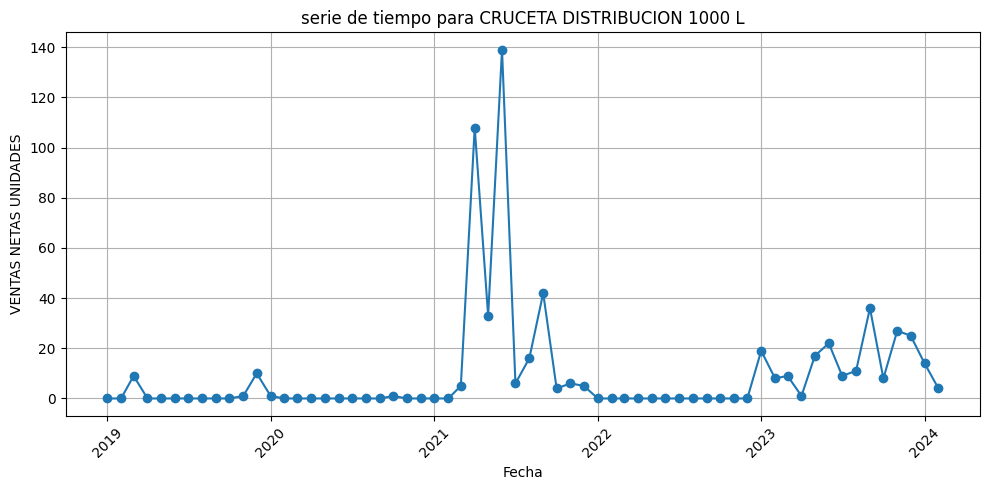

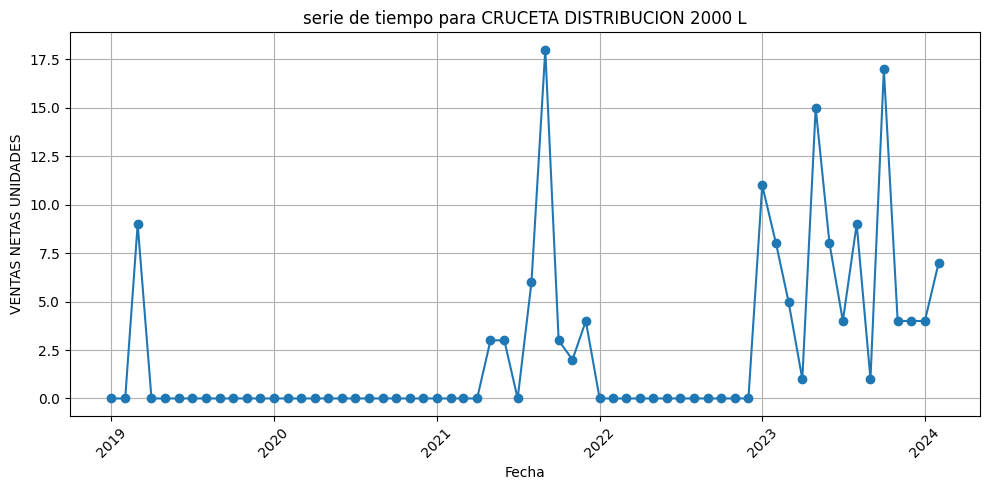

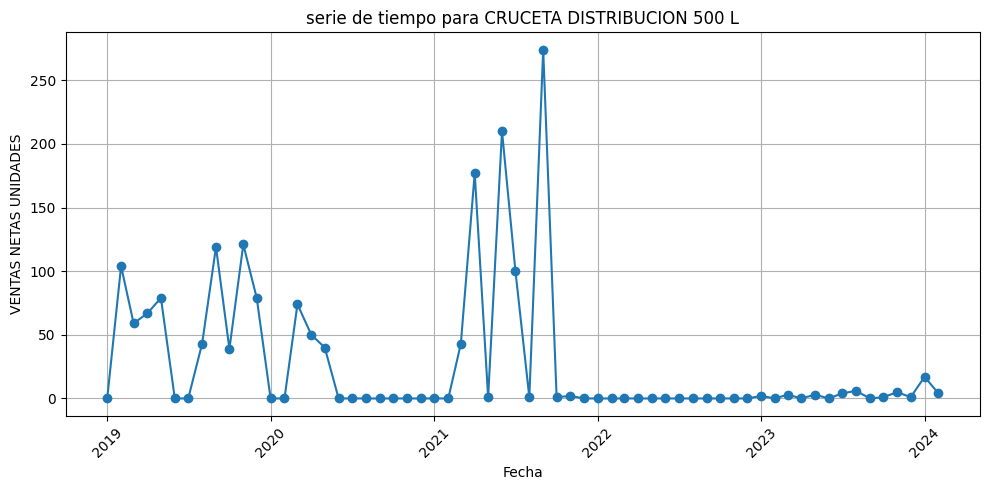

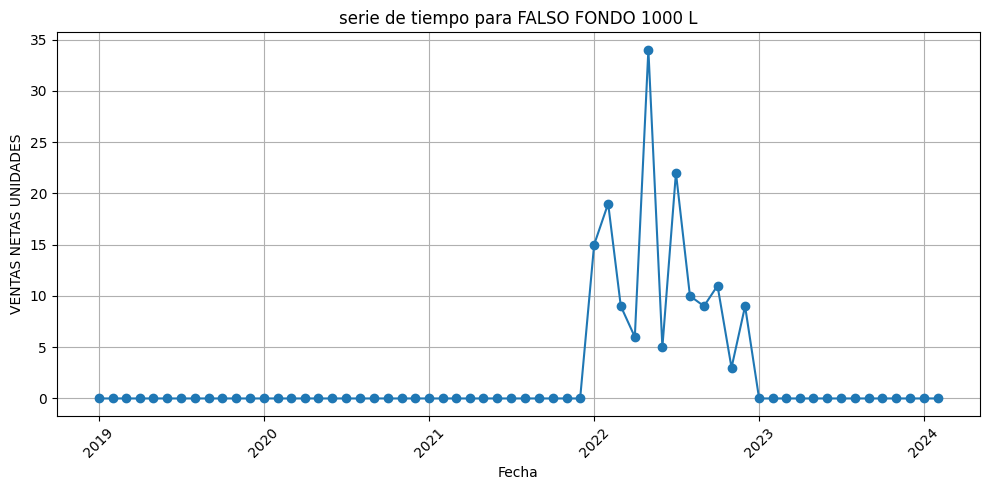

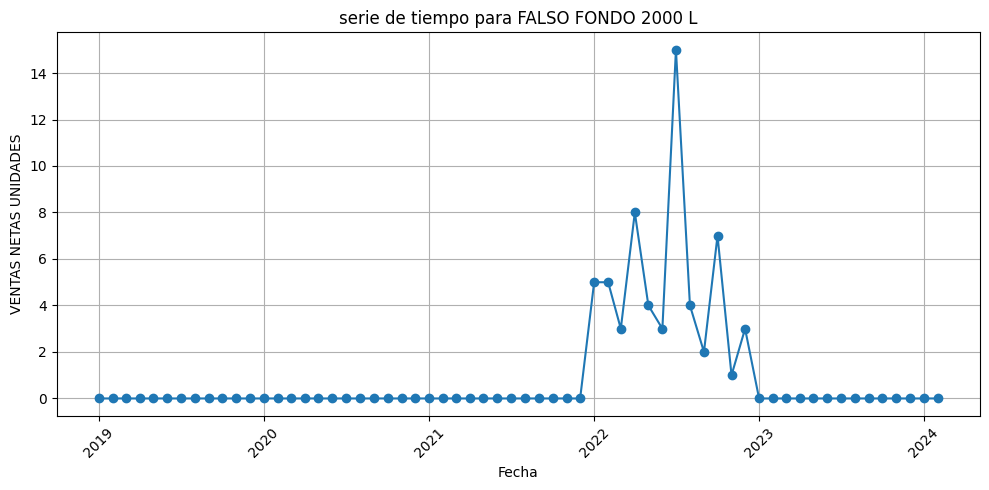

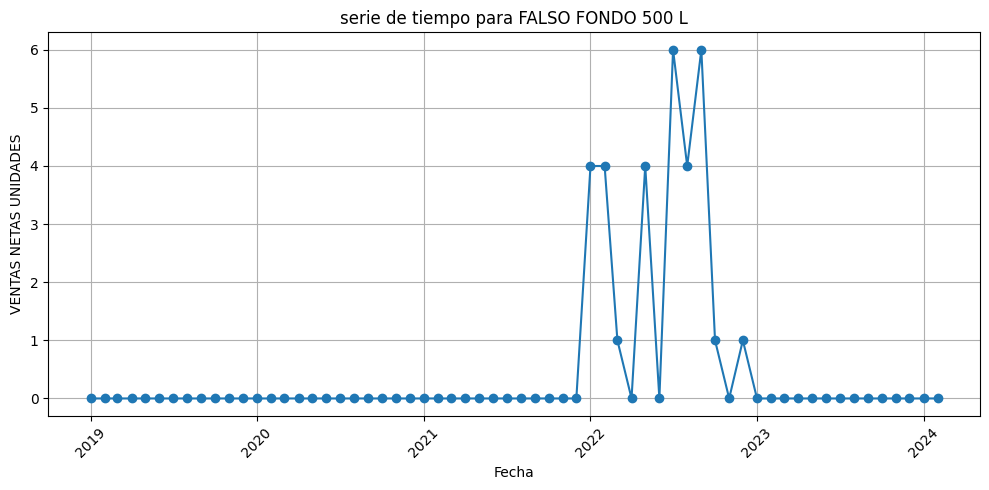

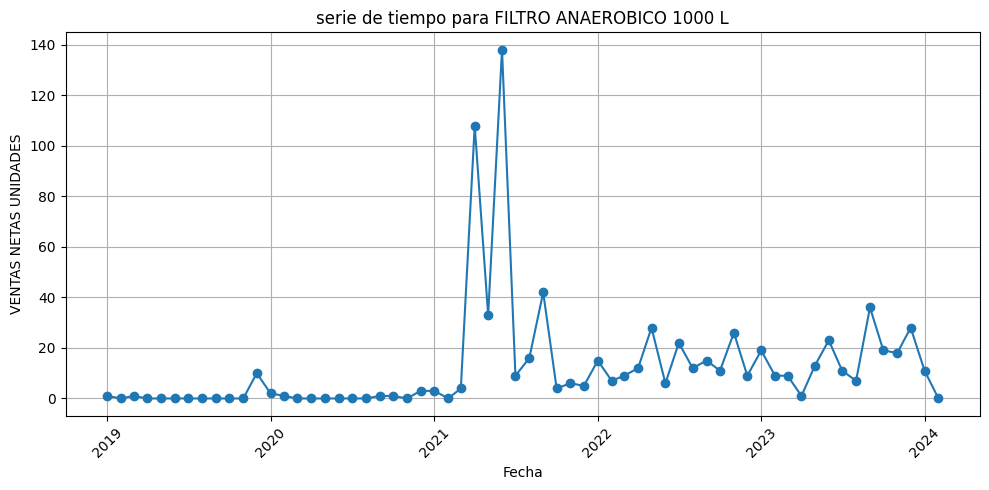

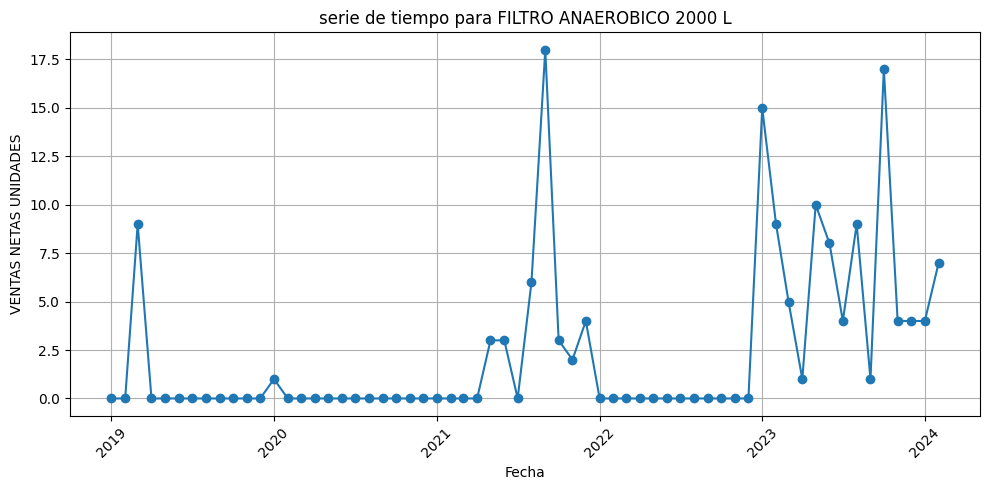

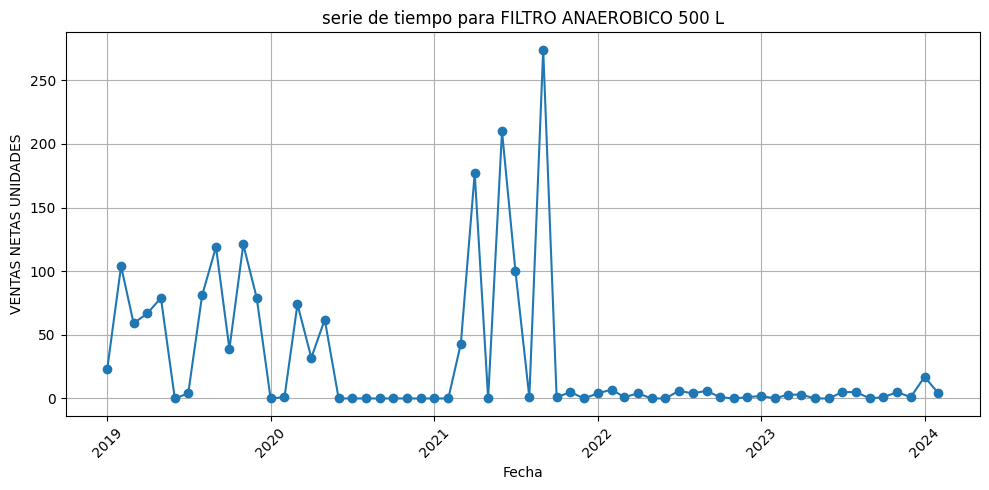

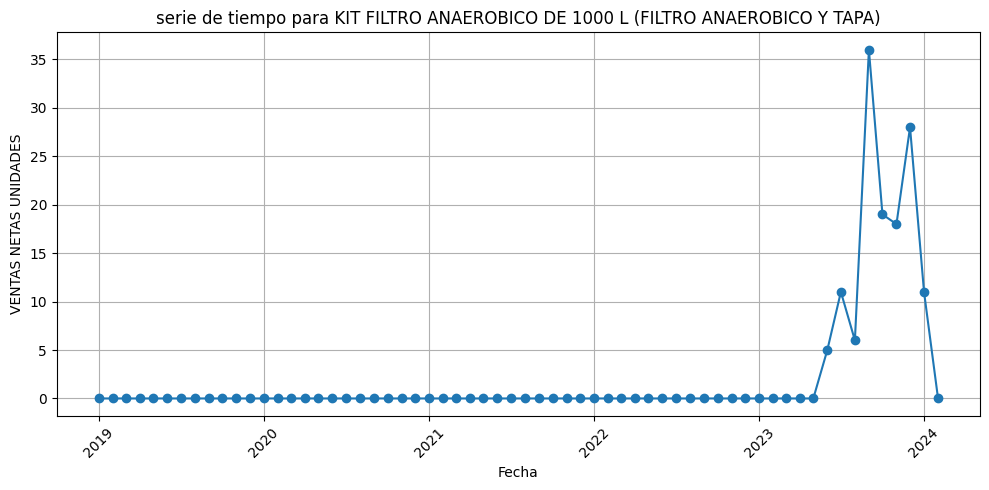

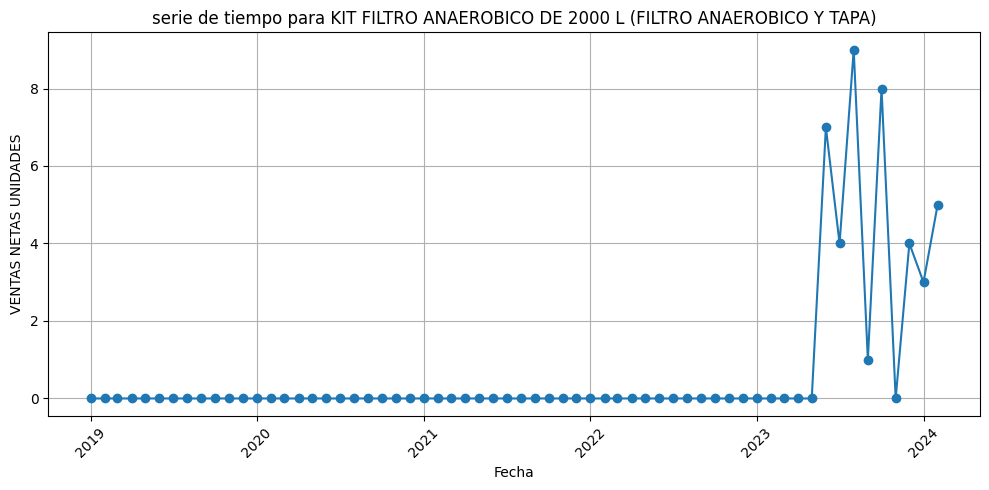

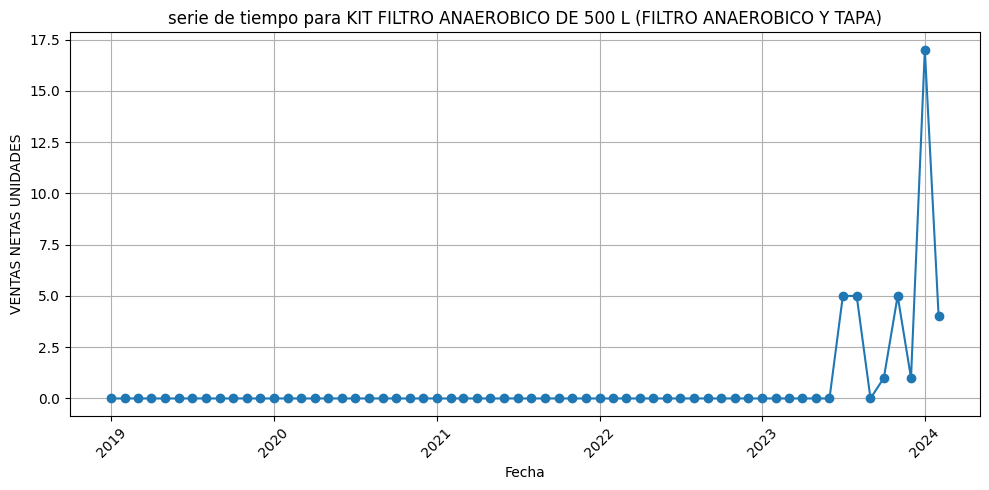

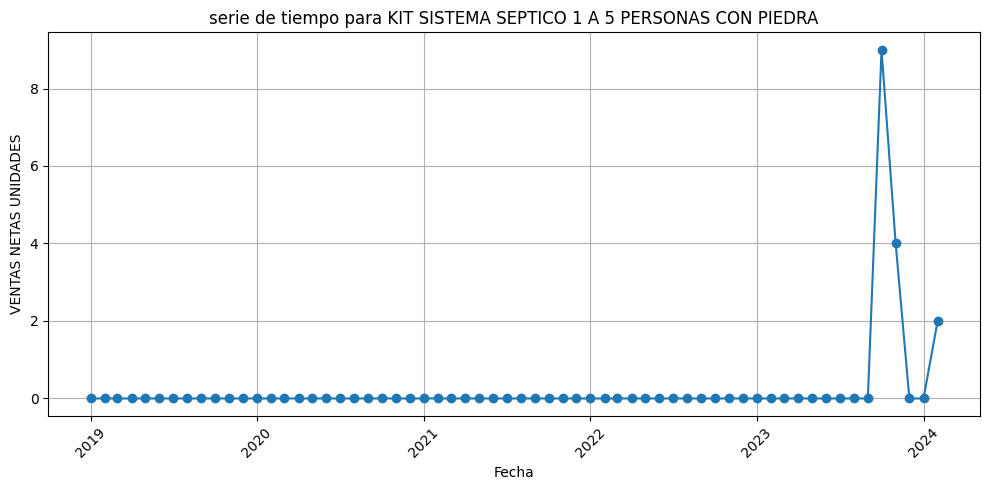

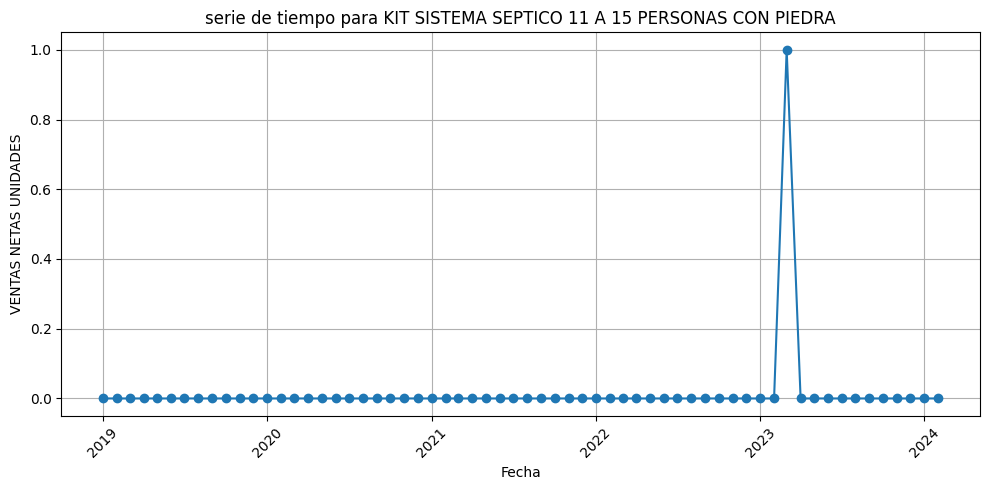

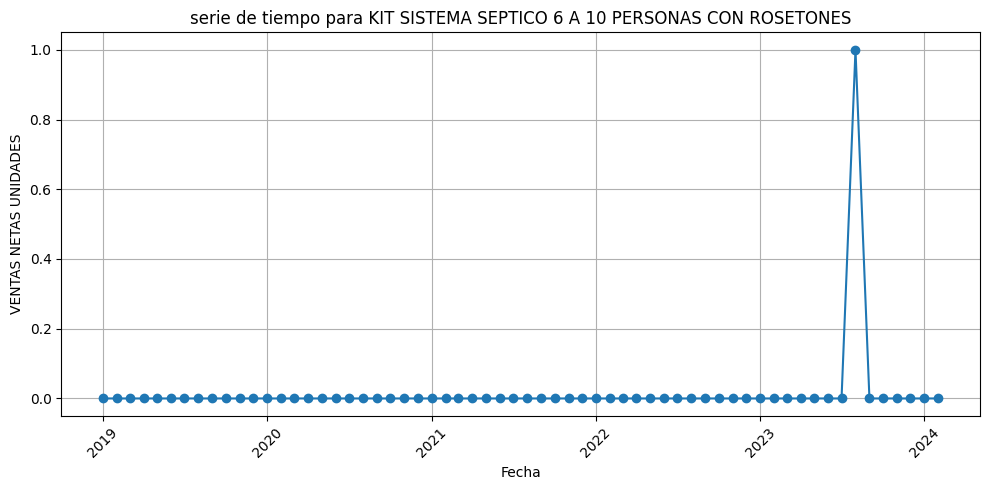

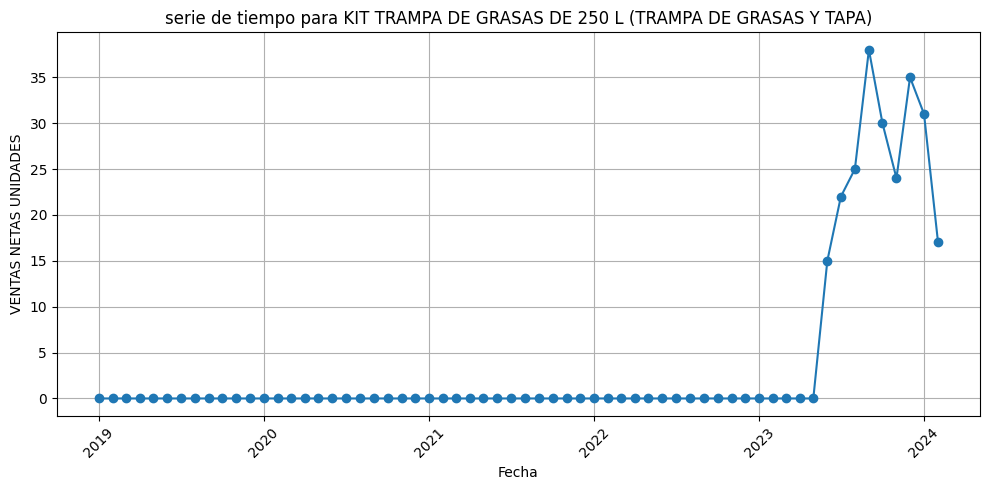

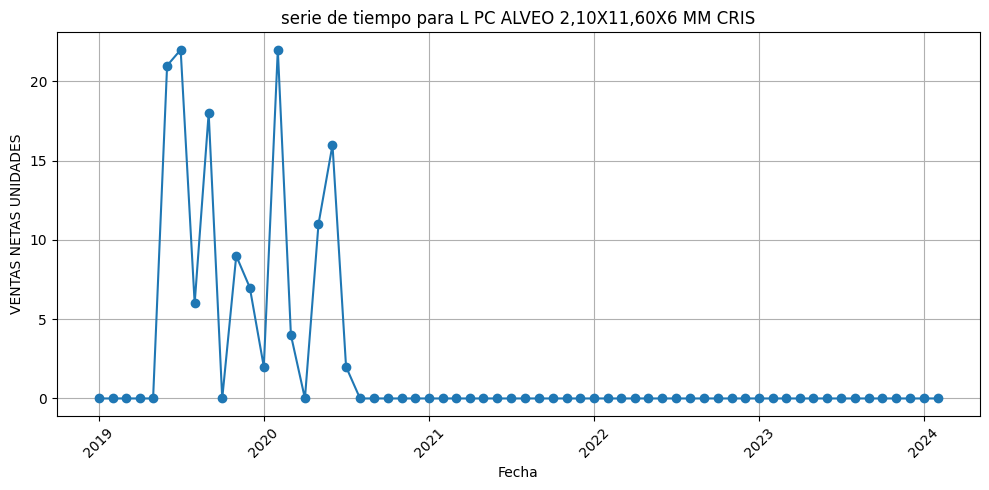

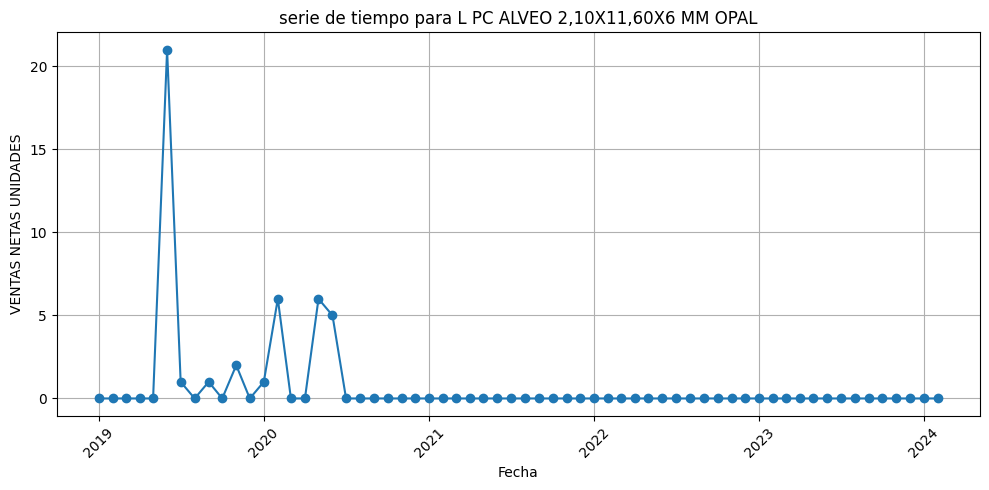

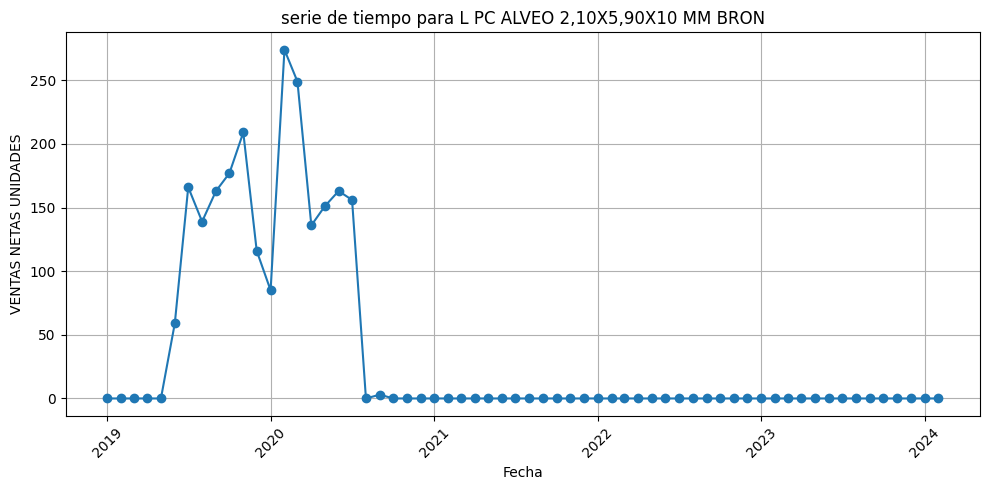

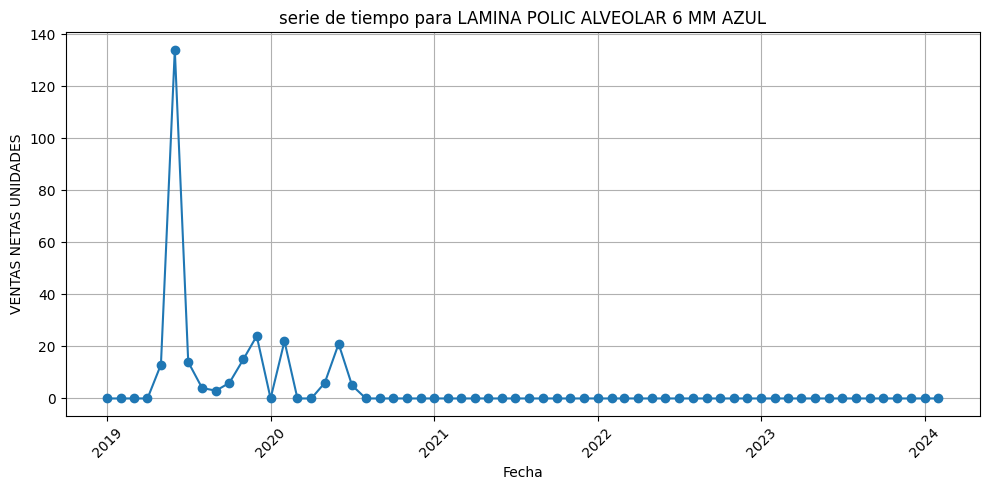

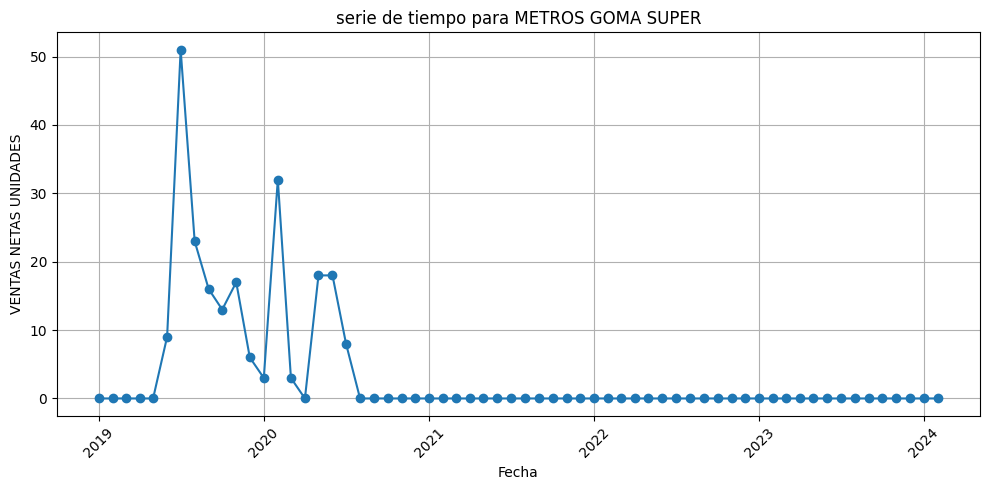

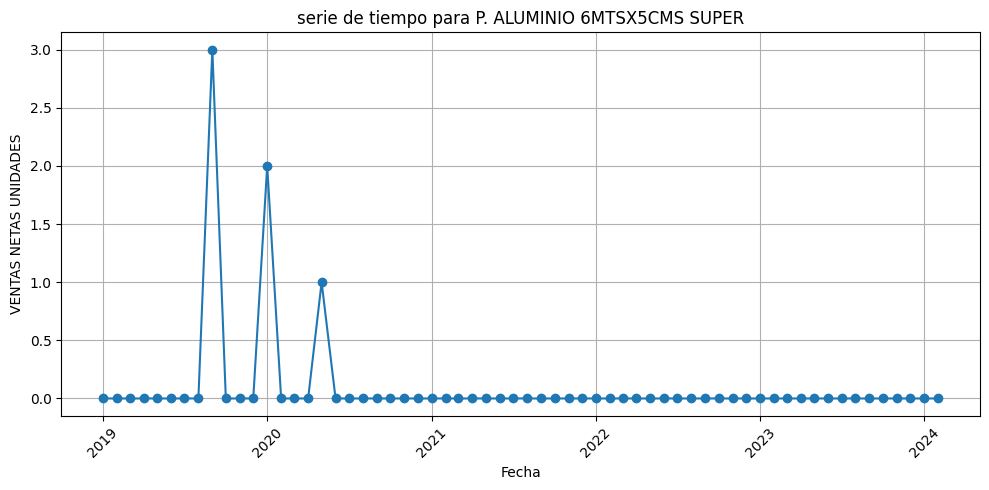

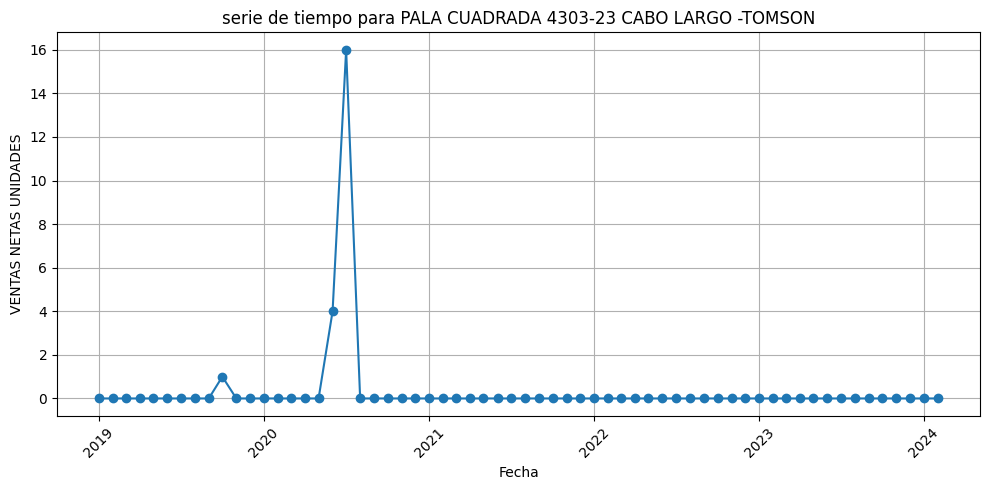

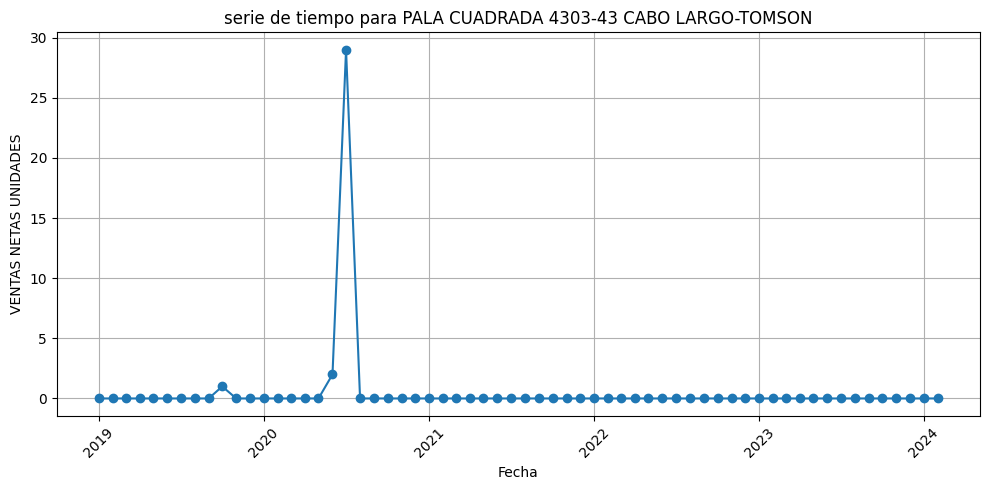

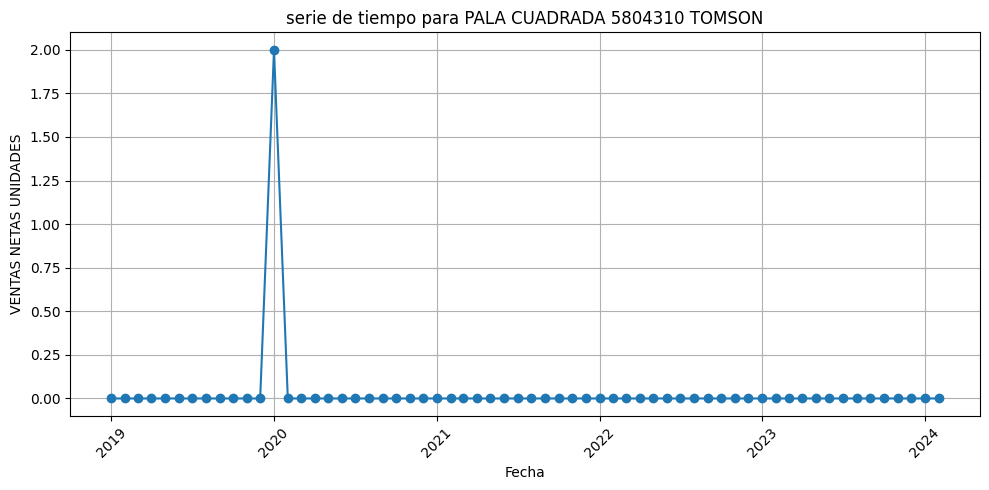

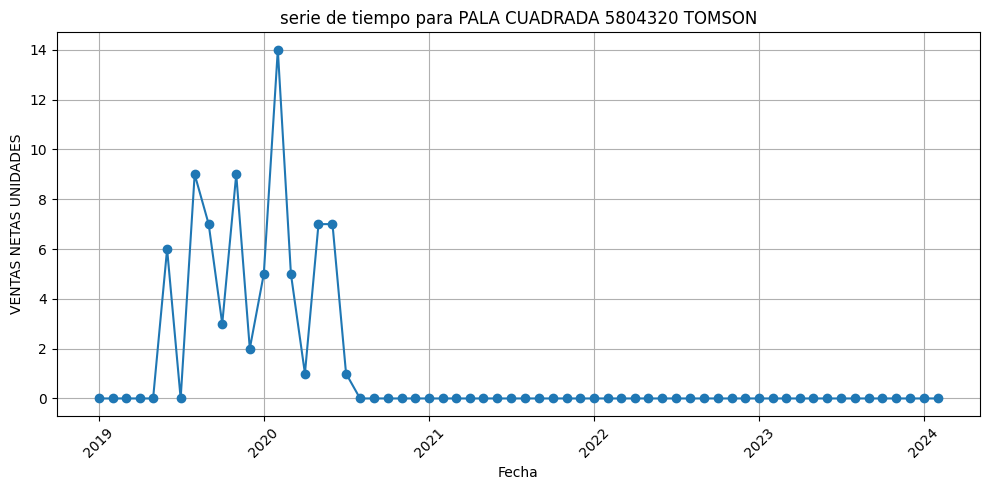

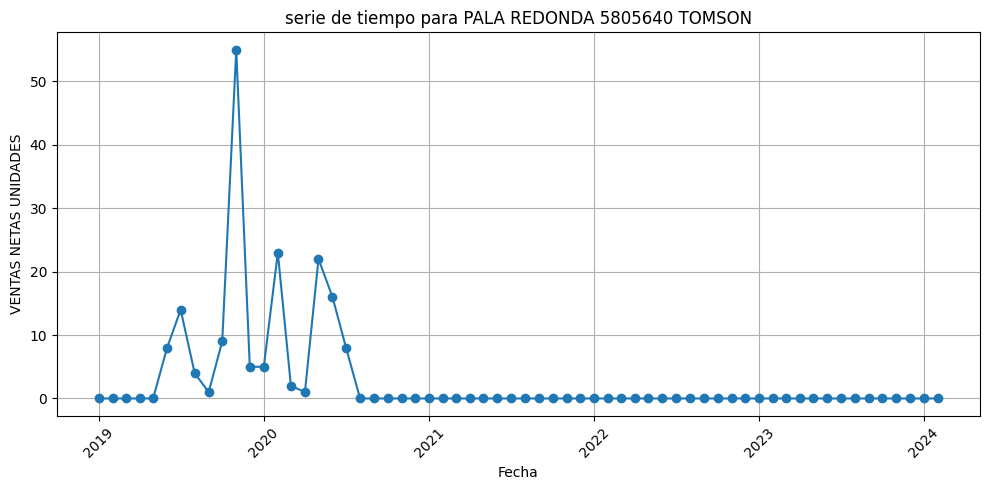

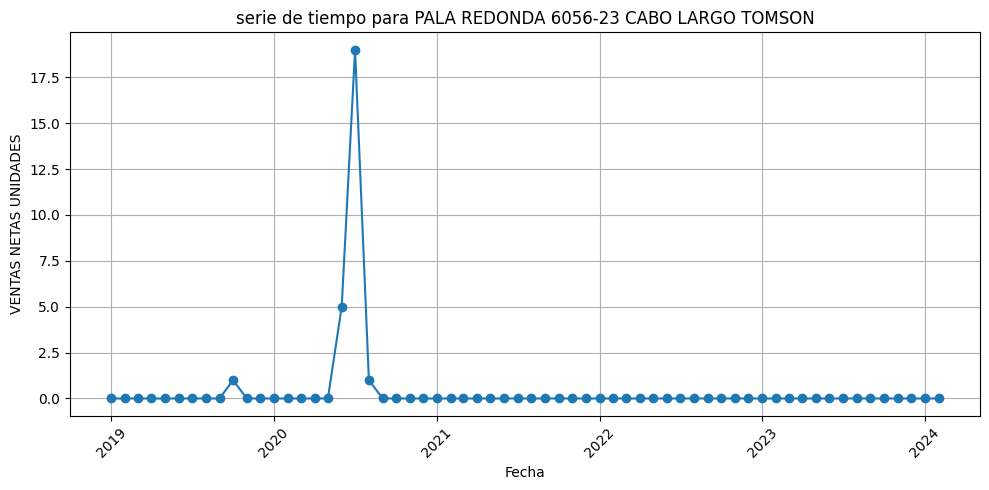

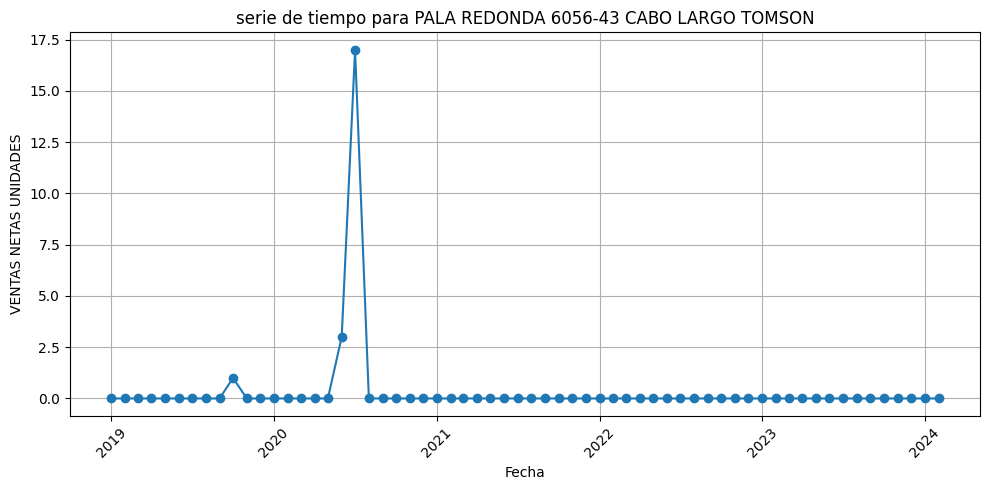

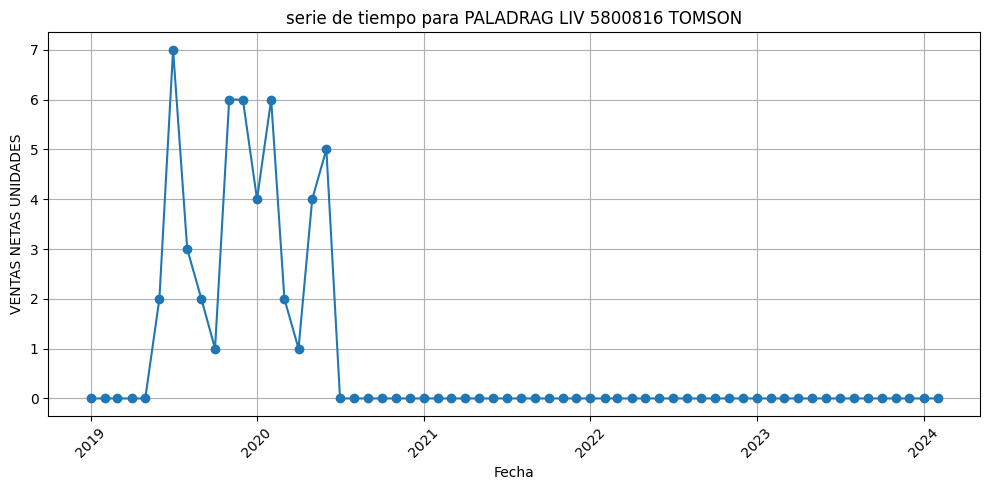

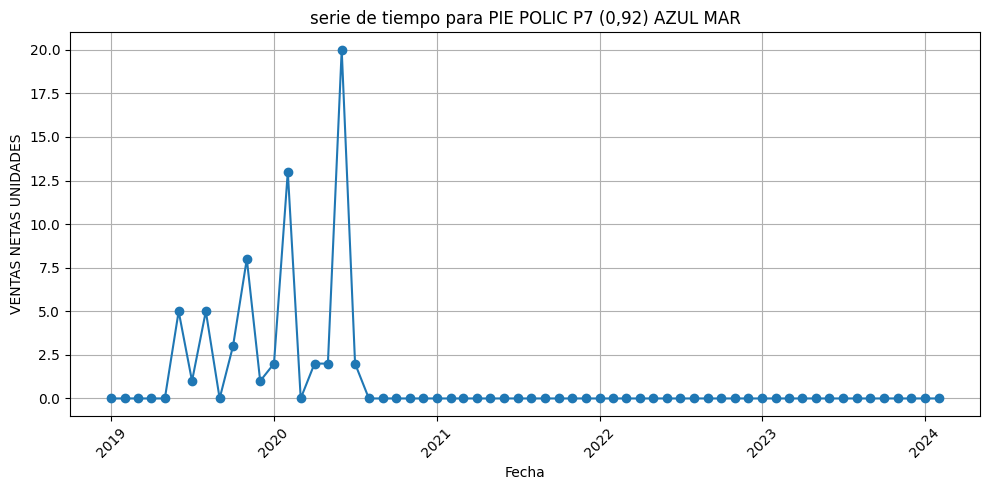

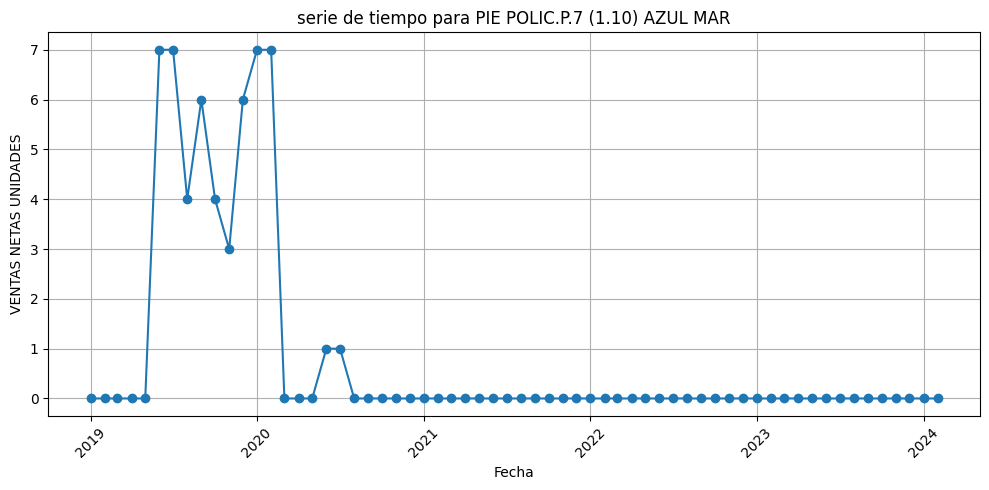

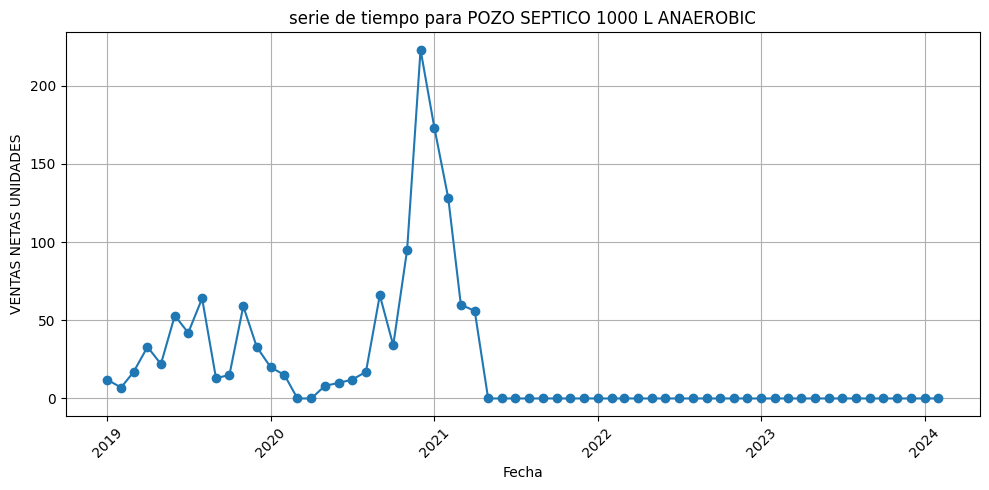

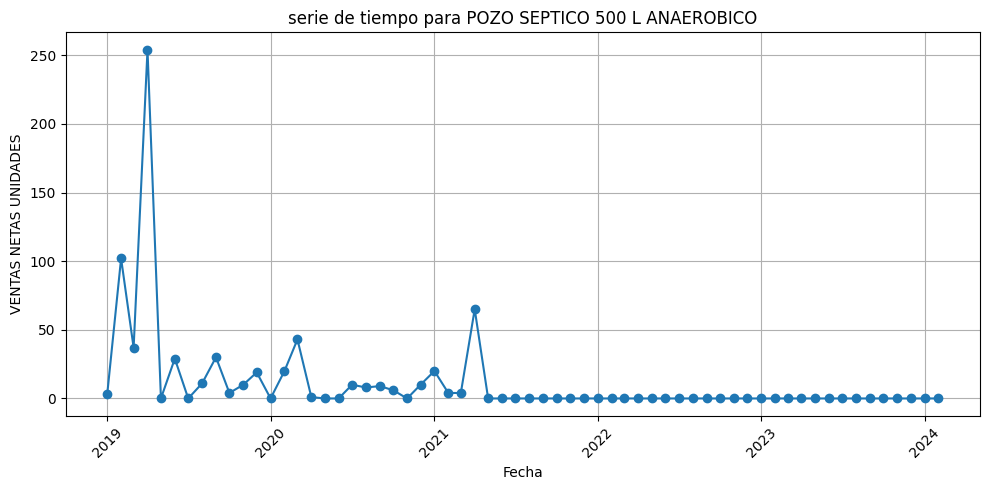

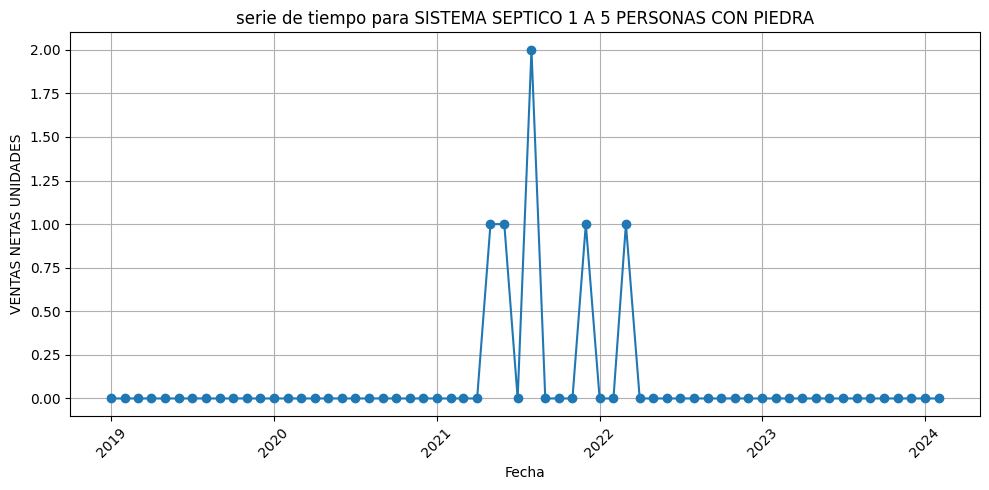

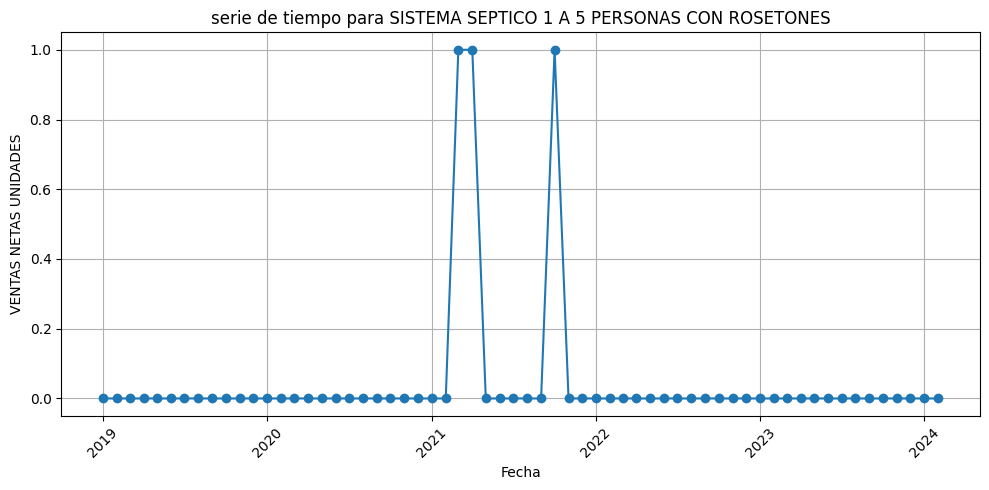

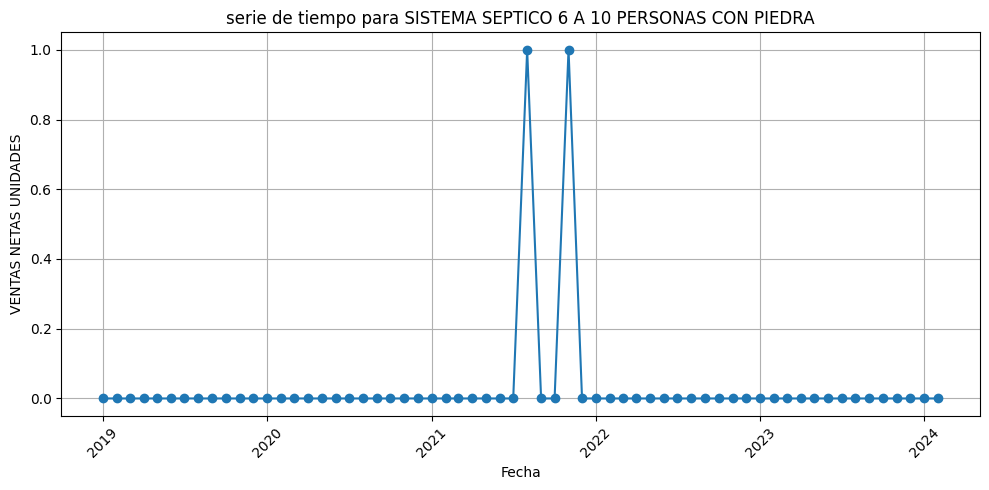

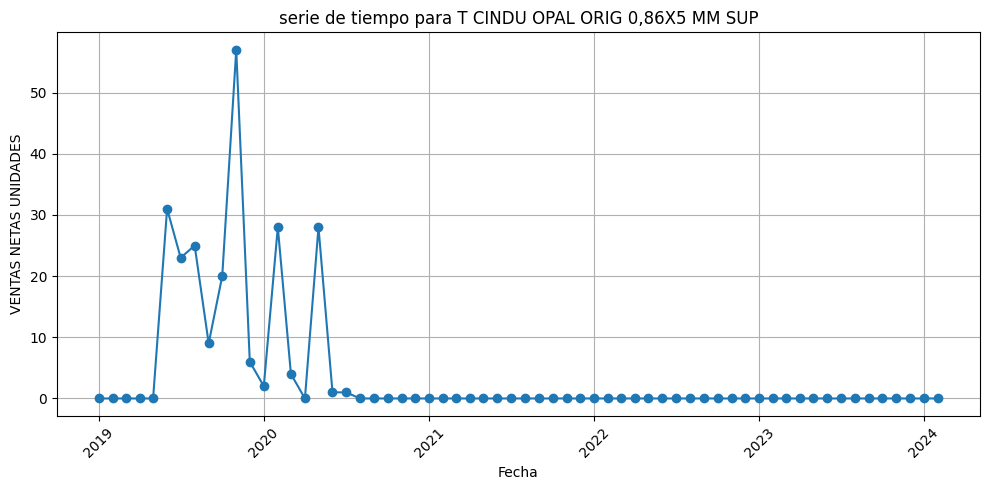

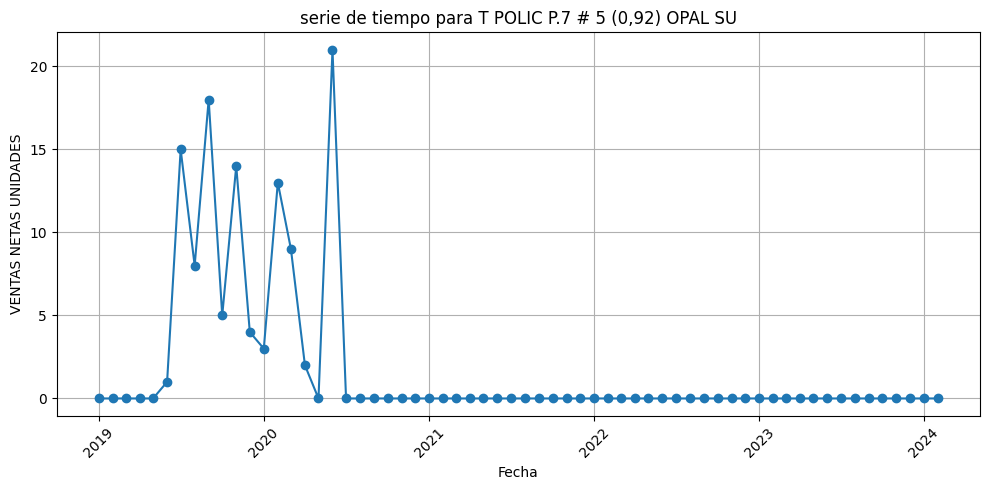

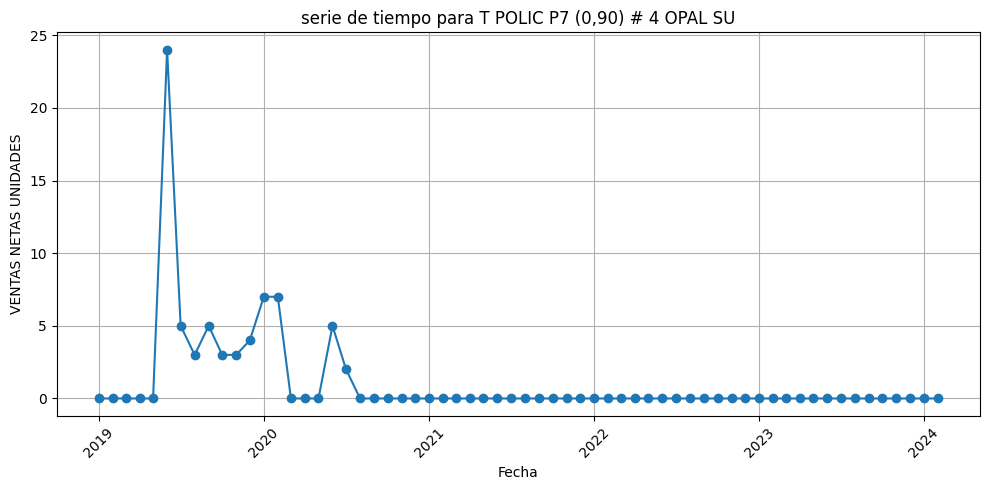

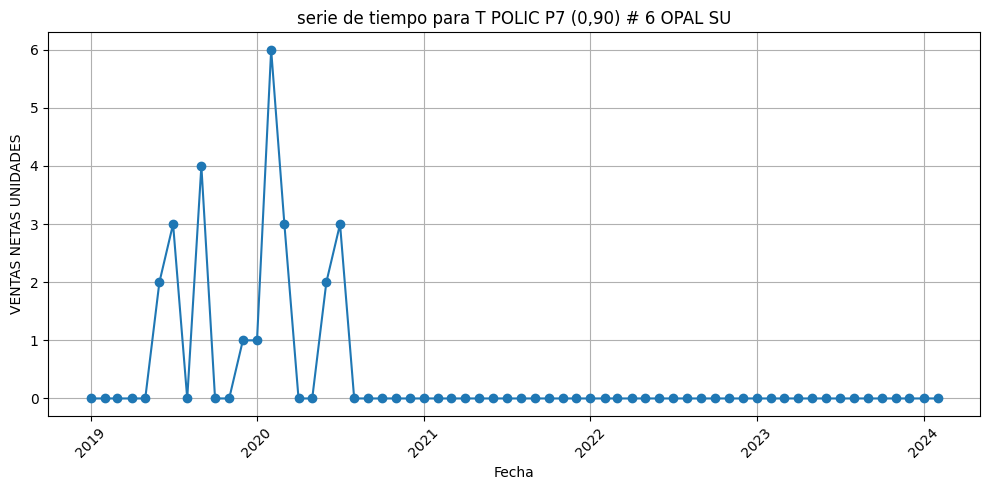

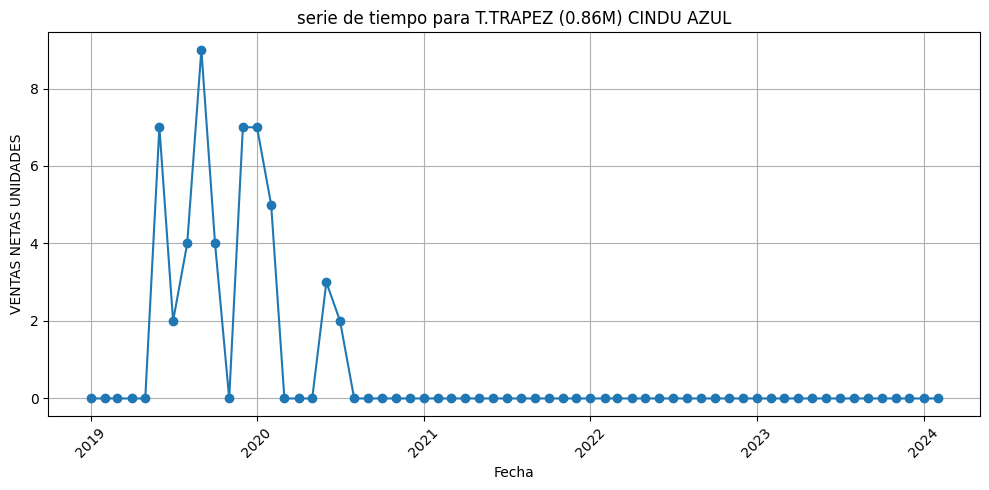

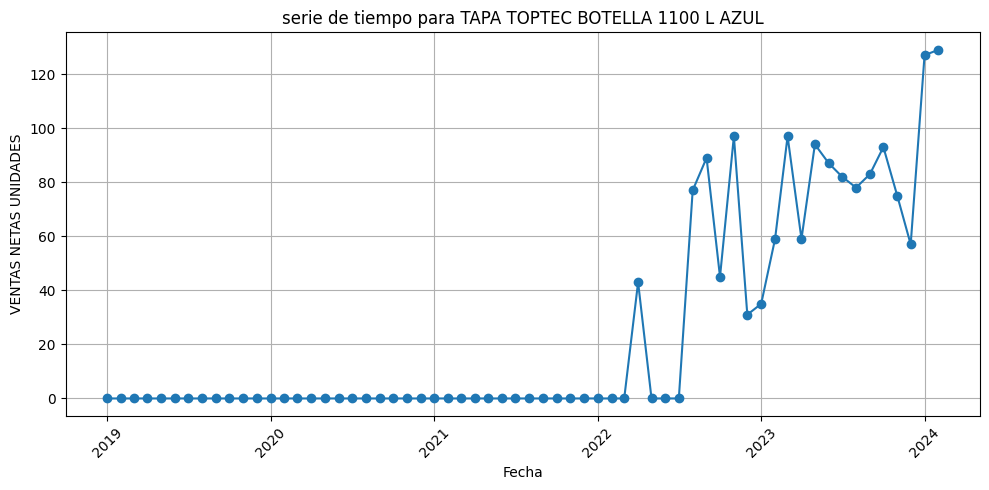

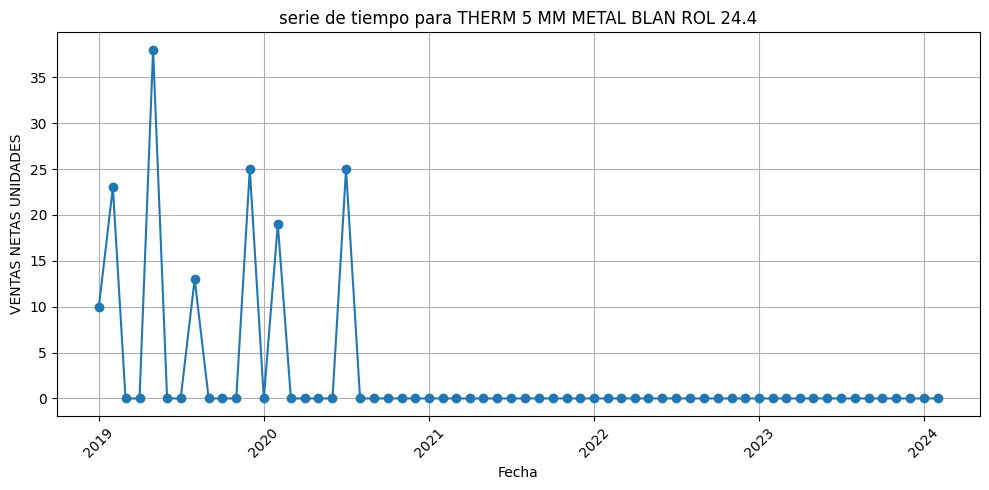

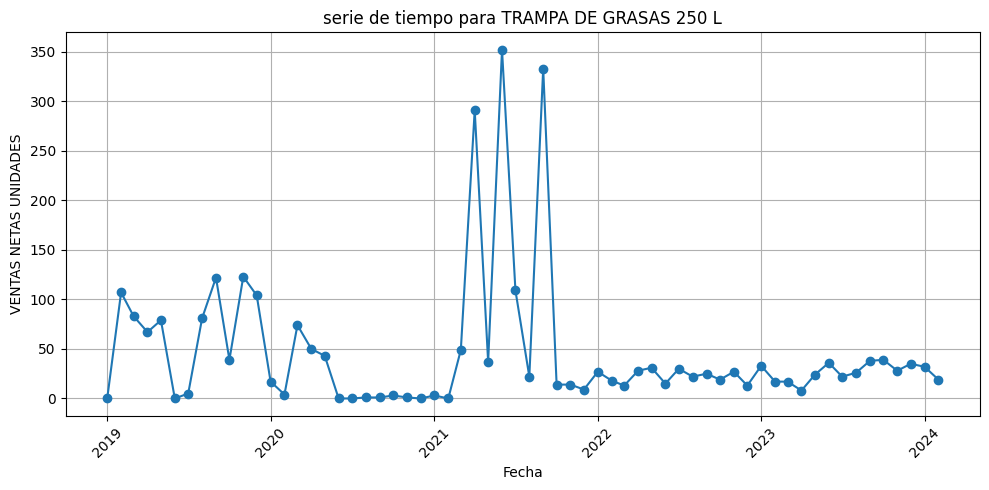

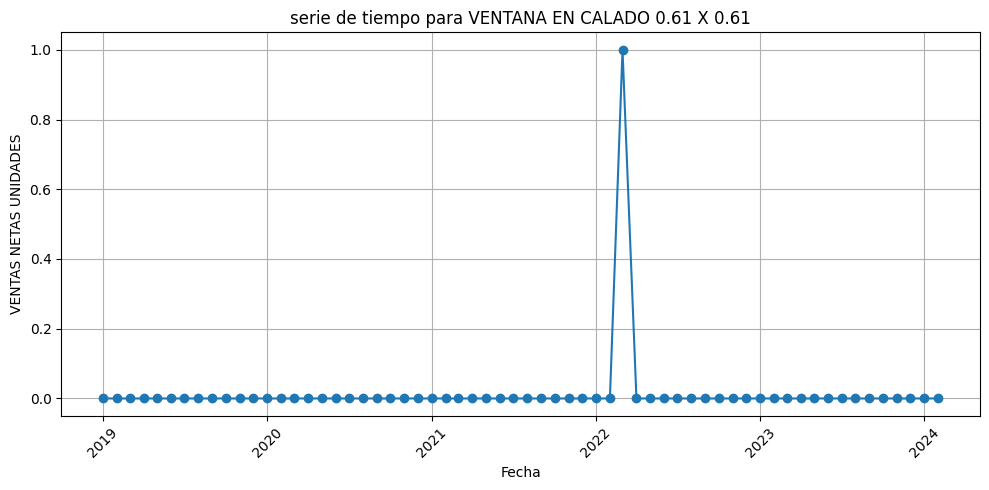

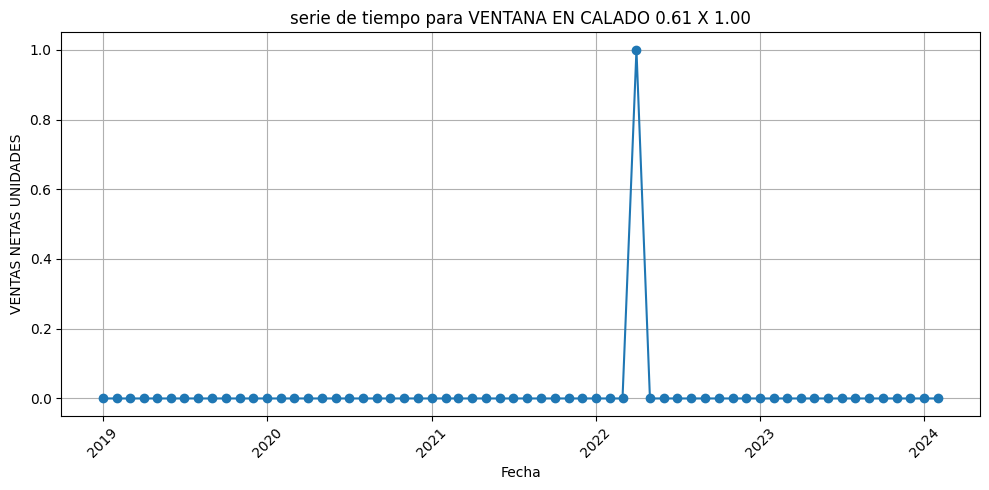

In [ ]:
# Crear un rango de fechas mensual que cubra todo el período de datos
fecha_inicio = ventas_corregido['Fecha'].min().replace(day=1)
fecha_fin = ventas_corregido['Fecha'].max().replace(day=1)
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# Graficar la tendencia de ventas mensuales de cada producto secundarios con el período completo
for producto in productos_secundarios:
    # Filtrar los datos de cada producto
    df_producto = ventas_corregido[ventas_corregido['NOMBRE ITEM SAP'] == producto]

    # Agrupar las ventas por mes y llenar los meses faltantes con 0
    df_mensual = df_producto.groupby(pd.Grouper(key='Fecha', freq='MS'))['VENTAS NETAS UNIDADES'].sum().reindex(rango_fechas, fill_value=0).reset_index()
    df_mensual.columns = ['Fecha', 'VENTAS NETAS UNIDADES']

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df_mensual['Fecha'], df_mensual['VENTAS NETAS UNIDADES'], marker='o', linestyle='-')
    plt.title(f'serie de tiempo para {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('VENTAS NETAS UNIDADES')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
    plt.tight_layout()  # Ajustar el diseño
    plt.show()

De las gráficas anteriores podemos identificar que los siguientes productos ya no se están vendiendo en la empresa y se pueden descartar del dataset:
- ARMECOLOR 1.00 X 2.44 ROJO
- CABALLETE PVC P7
- FALSO FONDO 1000 L
- FALSO FONDO 2000 L
- FALSO FONDO 500 L
- KIT SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA
- KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA
- KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES
- L PC ALVEO 2,10X11,60X6 MM CRIS
- L PC ALVEO 2,10X11,60X6 MM OPAL
- L PC ALVEO 2,10X5,90X10 MM BRON
- LAMINA POLIC ALVEOLAR 6 MM
- METROS GOMA SUPER
- P. ALUMINIO 6MTSX5CMS SUPER
- PALA CUADRADA 4303-23 CABO LARGO -TOMSON
- PALA CUADRADA 4303-43 CABO LARGO-TOMSON
- PALA CUADRADA 5804310 TOMSON
- PALA CUADRADA 5804320 TOMSON
- PALA REDONDA 5805640 TOMSON
- PALA REDONDA 6056-23 CABO LARGO TOMSON
- PALA REDONDA 6056-43 CABO LARGO TOMSON
- PALADRAG LIV 5800816 TOMSON
- PIE POLIC P7 (0,92) MAR
- PIE POLIC.P.7 (1.10) MAR
- POZO SEPTICO 1000 L ANAEROBIC
- POZO SEPTICO 500 L ANAEROBICO
- SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA
- SISTEMA SEPTICO 1 A 5 PERSONAS CON ROSETONES
- SISTEMA SEPTICO 6 A 10 PERSONAS CON PIEDRA
- T CINDU OPAL ORIG 0,86X5 MM SUP
- T POLIC P.7 # 5 (0,92) OPAL SU
- T POLIC P7 (0,90) # 4 OPAL SU
- T POLIC P7 (0,90) # 6 OPAL SU
- T.TRAPEZ (0.86M) CINDU
- THERM 5 MM METAL BLAN ROL 24.4
- VENTANA EN CALADO 0.61 X 0.61
- VENTANA EN CALADO 0.61 X 1.00

Tambien eliminamos los prodcutos de color azul debido a que no son muy vendidos y su comportamiento es distinto

In [ ]:
# Eliminamos los productos que identicamos anteriormente que ya no se están vendiendo en la empresa
productos_a_eliminar = ['KIT JUEGO TANQUE 250 L AZUL (TANQUE 250 L + TAPA)','KIT JUEGO TANQUE 500 L AZUL (TANQUE 500 L + TAPA)','KIT JUEGO TANQUE TOPTEC 250 L AZUL','KIT JUEGO TANQUE 2000 L AZUL (TANQUE 2000 L + TAPA)','KIT JUEGO TANQUE 1000 L AZUL (TANQUE 1000 L + TAPA)','KIT JUEGO TANQUE TOPTEC 500 L AZUL','KIT JUEGO TANQUE 250 L AZUL (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )','PIE POLIC.P.7 (1.10) AZUL MAR','TANQUE TOPTEC 250 L AZUL','KIT JUEGO TANQUE 2000 L AZUL (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )','T.TRAPEZ (0.86M) CINDU AZUL','TAPA TANQUE TOPTEC 250 L AZUL','TANQUE TOPTEC 2000 L AZUL','TAPA TANQUE TOPTEC 2000 L AZUL','KIT JUEGO TANQUE 500 L AZUL (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )','LAMINA POLIC ALVEOLAR 6 MM AZUL','KIT JUEGO TANQUE 1000 L AZUL (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )','JUEGO TANQUE TOPTEC 250 L AZUL','TAPA TANQUE TOPTEC 500 L AZUL','TANQUE TOPTEC 500 L AZUL','TAPA TANQUE TOPTEC 1000 L AZUL','TANQUE TOPTEC 1000 L AZUL','JUEGO TANQUE TOPTEC 2000 L AZUL','KIT JUEGO TANQUE AZUL BOTELLA 1100 L (TANQUE + TAPA +JUEGO DE ACCESORIOS)','KIT JUEGO TANQUE TOPTEC AZUL BOTELLA 1100 L','JUEGO TANQUE TOPTEC 500 L AZUL','JUEGO TANQUE TOPTEC 1000 L AZUL','TAPA TOPTEC BOTELLA 1100 L AZUL','TANQUE TOPTEC BOTELLA 1100 L AZUL','JUEGO TANQUE TOPTEC AZUL BOTELLA 1100 L','ARMECOLOR 1.00 X 2.44 ROJO','CABALLETE PVC P7','FALSO FONDO 1000 L','FALSO FONDO 2000 L','FALSO FONDO 500 L','KIT SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA','KIT SISTEMA SEPTICO 11 A 15 PERSONAS CON PIEDRA','KIT SISTEMA SEPTICO 6 A 10 PERSONAS CON ROSETONES','L PC ALVEO 2,10X11,60X6 MM CRIS','L PC ALVEO 2,10X11,60X6 MM OPAL','L PC ALVEO 2,10X5,90X10 MM BRON','LAMINA POLIC ALVEOLAR 6 MM','METROS GOMA SUPER','P. ALUMINIO 6MTSX5CMS SUPER','PALA CUADRADA 4303-23 CABO LARGO -TOMSON','PALA CUADRADA 4303-43 CABO LARGO-TOMSON','PALA CUADRADA 5804310 TOMSON','PALA CUADRADA 5804320 TOMSON','PALA REDONDA 5805640 TOMSON','PALA REDONDA 6056-23 CABO LARGO TOMSON','PALA REDONDA 6056-43 CABO LARGO TOMSON','PALADRAG LIV 5800816 TOMSON','PIE POLIC P7 (0,92) MAR','PIE POLIC.P.7 (1.10) MAR','POZO SEPTICO 1000 L ANAEROBIC','POZO SEPTICO 500 L ANAEROBICO','SISTEMA SEPTICO 1 A 5 PERSONAS CON PIEDRA','SISTEMA SEPTICO 1 A 5 PERSONAS CON ROSETONES','SISTEMA SEPTICO 6 A 10 PERSONAS CON PIEDRA','T CINDU OPAL ORIG 0,86X5 MM SUP','T POLIC P.7 # 5 (0,92) OPAL SU','T POLIC P7 (0,90) # 4 OPAL SU','T POLIC P7 (0,90) # 6 OPAL SU','T.TRAPEZ (0.86M) CINDU','THERM 5 MM METAL BLAN ROL 24.4','VENTANA EN CALADO 0.61 X 0.61','VENTANA EN CALADO 0.61 X 1.00']

# Filtrar el DataFrame para conservar solo las filas que no tienen esos valores en la columna
ventas_corregido = ventas_corregido[~ventas_corregido['NOMBRE ITEM SAP'].isin(productos_a_eliminar)]

Volvemos a analizar los nombres de los productos posterior al descarte de productos

In [ ]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_2.csv', index=False)

Identificamos que ahora tenemos productos con nombres similares y la empresa nos indico que a mediados del 2022 realizó un cambio en su sistema de facturación, por lo que algunos productos tuvieron un cambio en su nombre, así que vamos a analizar los siguientes productos "independientes":
- JUEGO TANQUE TOPTEC 2000 L
- TANQUE PLASTICO TOPTEC 2000 L
- KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )
- KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)

Como se puede observar en las gráficas anteriores los productos se están vendiendo en diferentes instantes de tiempo pero en esencia continuan siendo el mismo producto, así que ahora se procedera a estandarizar estos tipos de productos según su capacidad de la siguiente forma:
- KIT JUEGO TANQUE 2000 L: Abarcara los productos nombrados como:
    - JUEGO TANQUE TOPTEC 2000 L
    - TANQUE PLASTICO TOPTEC 2000 L
    - KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)
- KIT JUEGO TANQUE 1000 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC 1000 L
    - JUEGO TANQUE TOPTEC 1000 L
    - TANQUE PLASTICO TOPTEC 1000 L
    - KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA)
- KIT JUEGO TANQUE 500 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC 500 L
    - JUEGO TANQUE TOPTEC 500 L
    - TANQUE PLASTICO TOPTEC 500 L
    - KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA)
- KIT JUEGO TANQUE 250 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC 250 L
    - JUEGO TANQUE TOPTEC 250 L
    - TANQUE PLASTICO TOPTEC 250 L
    - KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA)
- KIT JUEGO TANQUE BAJITO 500 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC BAJITO 500 L
    - KIT JUEGO TANQUE BAJITO 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE BAJITO 500 L (TANQUE 500 L + TAPA)
- KIT JUEGO TANQUE BAJITO 250 L: Abarcara los productos nombrados como:
    - KIT JUEGO TANQUE TOPTEC BAJITO 250 L
    - JUEGO TANQUE TOPTEC BAJITO 250 L
    - KIT JUEGO TANQUE BAJITO 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )
    - KIT JUEGO TANQUE BAJITO 250 L (TANQUE 250 L + TAPA)
- KIT JUEGO TANQUE BOTELLA 1100 L: Abarcara los productos nombrados como:
    - JUEGO TANQUE TOPTEC BOTELLA 1100 L
    - KIT JUEGO TANQUE BOTELLA 1100 L (TANQUE + TAPA +JUEGO DE ACCESORIOS)

In [ ]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 2000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 2000 L (TANQUE 2000 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 2000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 2000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 1000 L (TANQUE 1000 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 1000 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 1000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 500 L (TANQUE 500 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 500 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE 250 L (TANQUE 250 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'TANQUE PLASTICO TOPTEC 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE 250 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC BAJITO 500 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 500 L (TANQUE BAJITO 500 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 500 L (TANQUE BAJITO 500 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 500 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC BAJITO 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE TOPTEC BAJITO 250 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 250 L (TANQUE BAJITO 250 L + TAPA + JUEGO DE CONEXIONES )', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BAJITO 250 L (TANQUE BAJITO 250 L + TAPA)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE BAJITO 250 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'JUEGO TANQUE TOPTEC BOTELLA 1100 L', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT JUEGO TANQUE BOTELLA 1100 L (TANQUE + TAPA +JUEGO DE ACCESORIOS)', 'NOMBRE ITEM SAP'] = 'KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L'


In [ ]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_3.csv', index=False)

Se vuelve a realizar el análisis de los productos ya que aún contamos con 41 productos diferentes

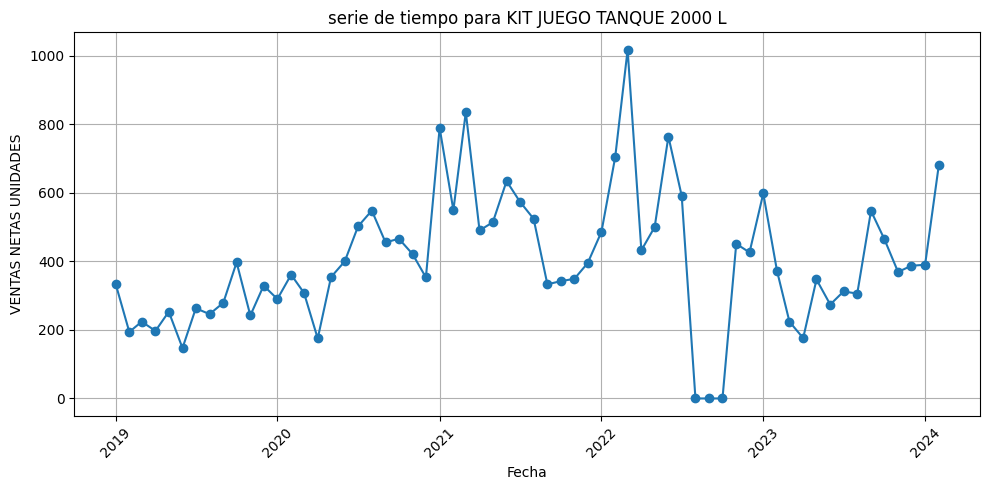

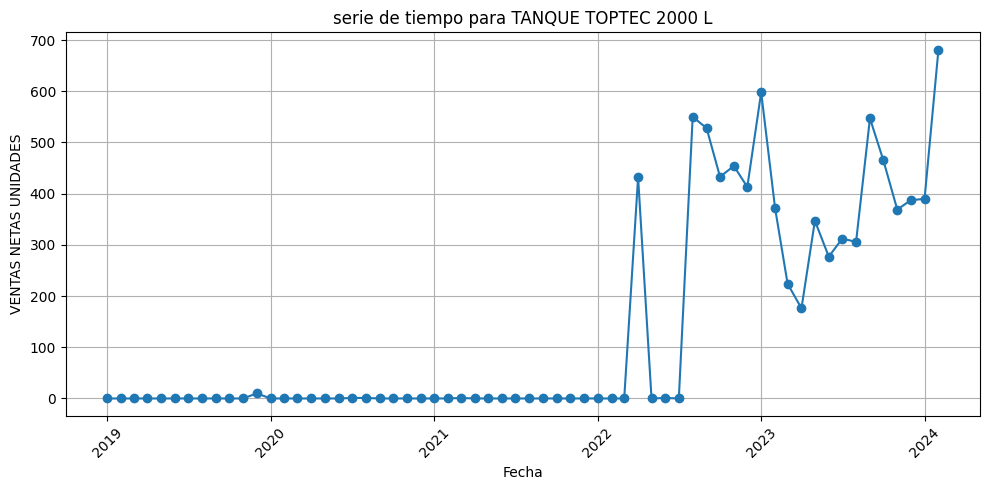

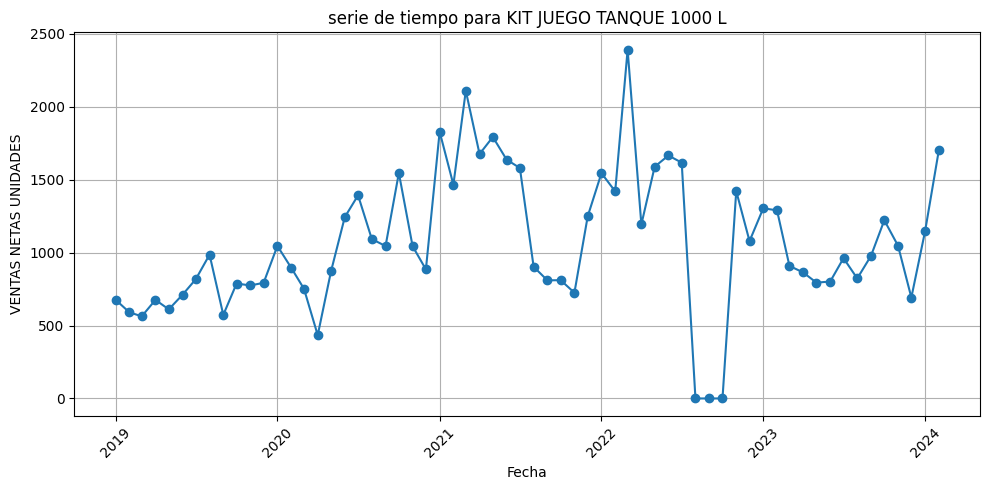

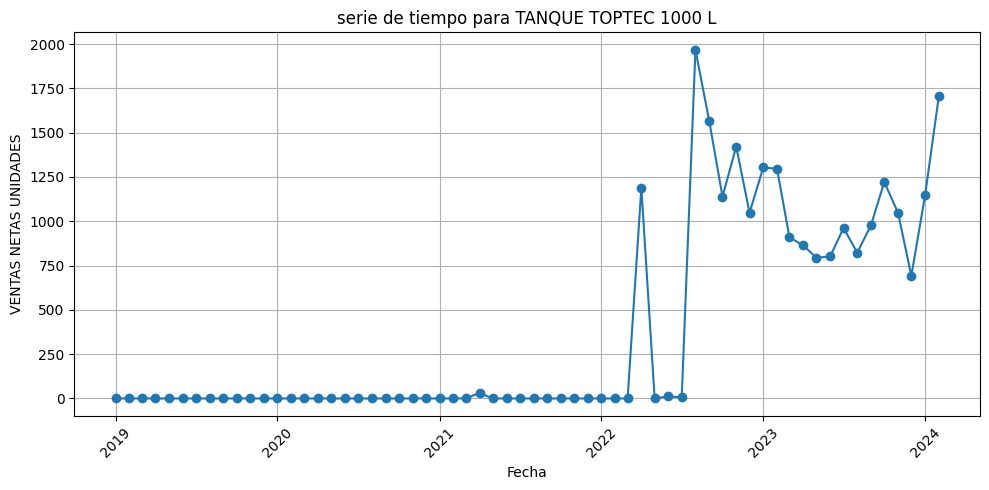

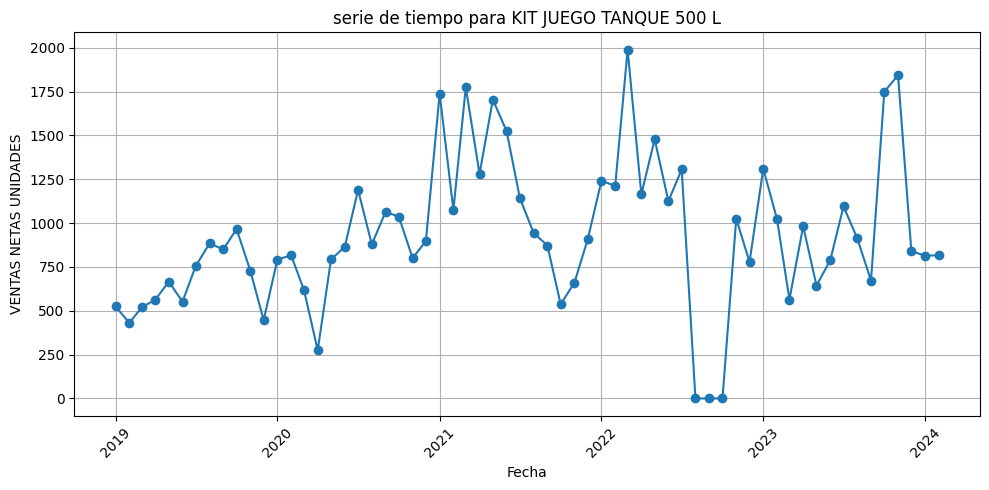

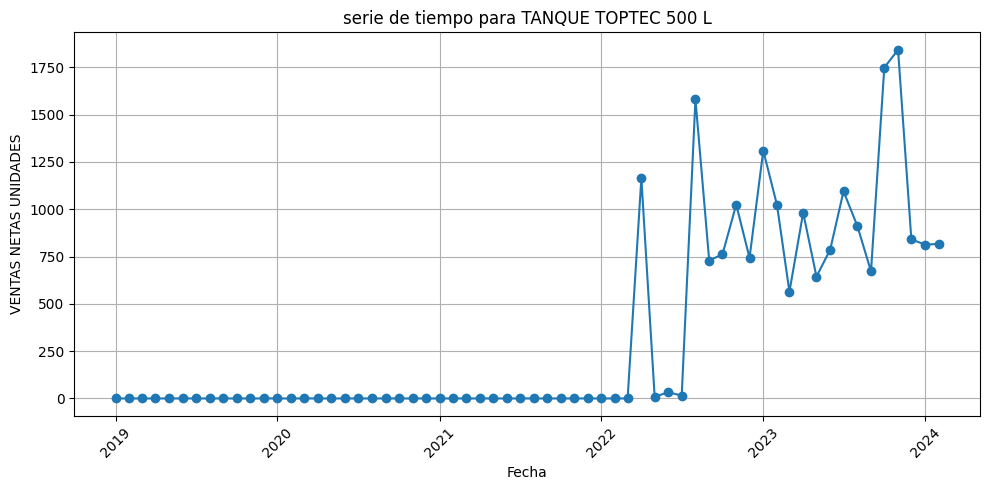

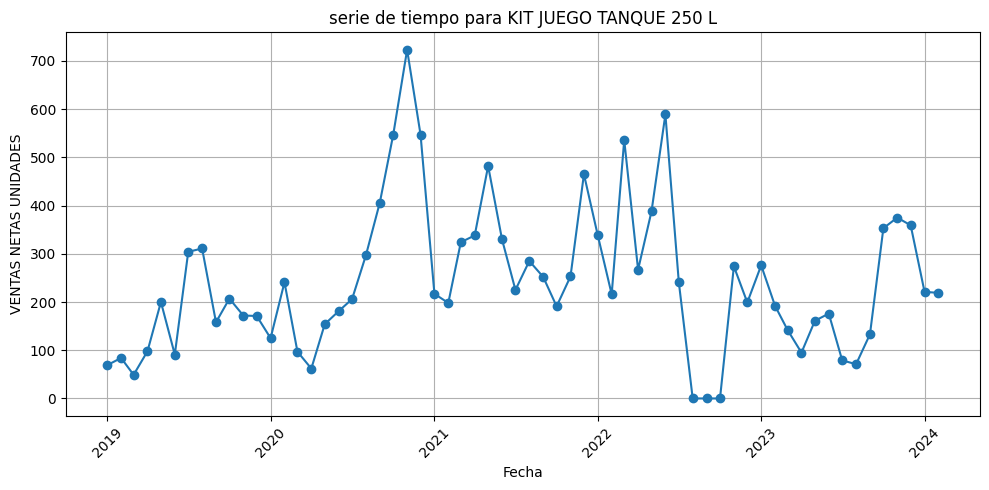

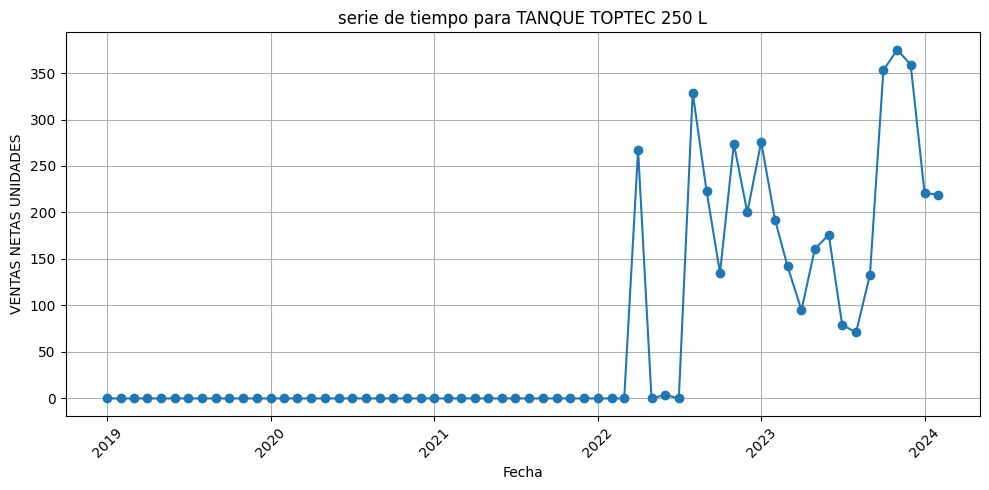

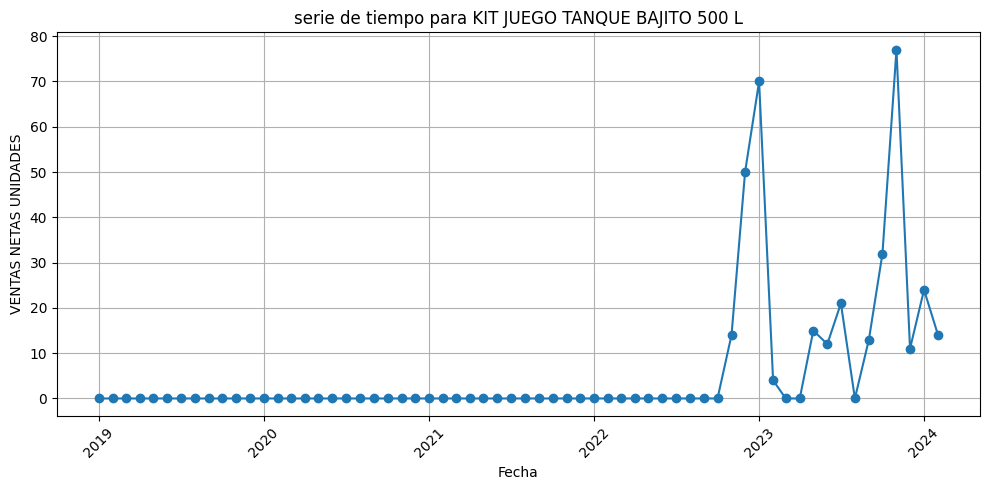

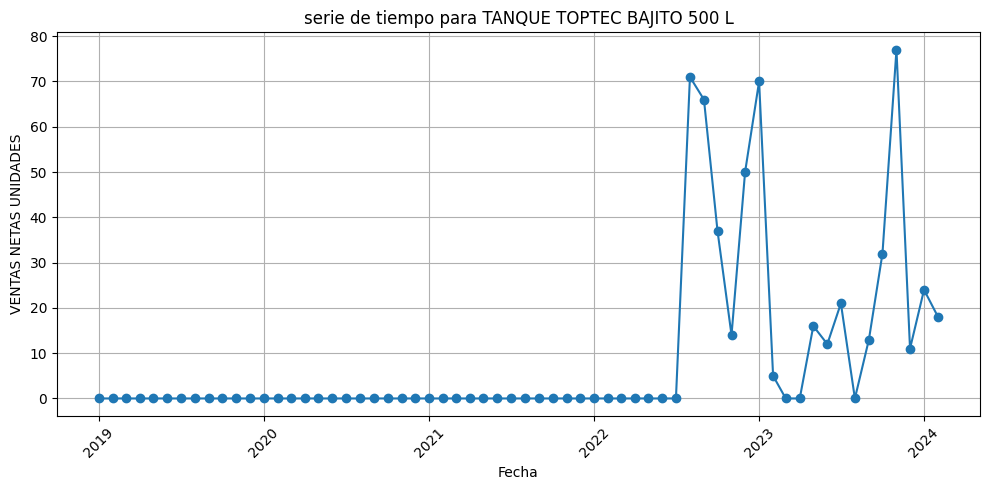

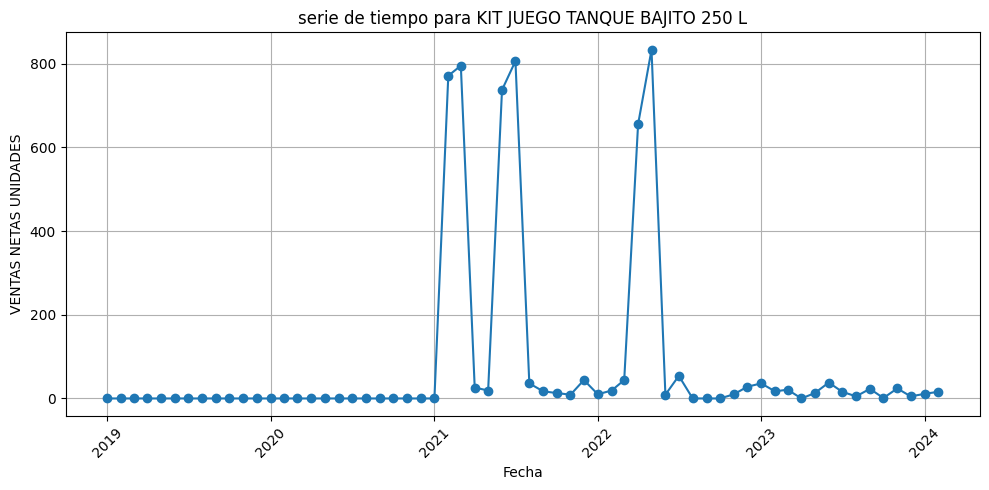

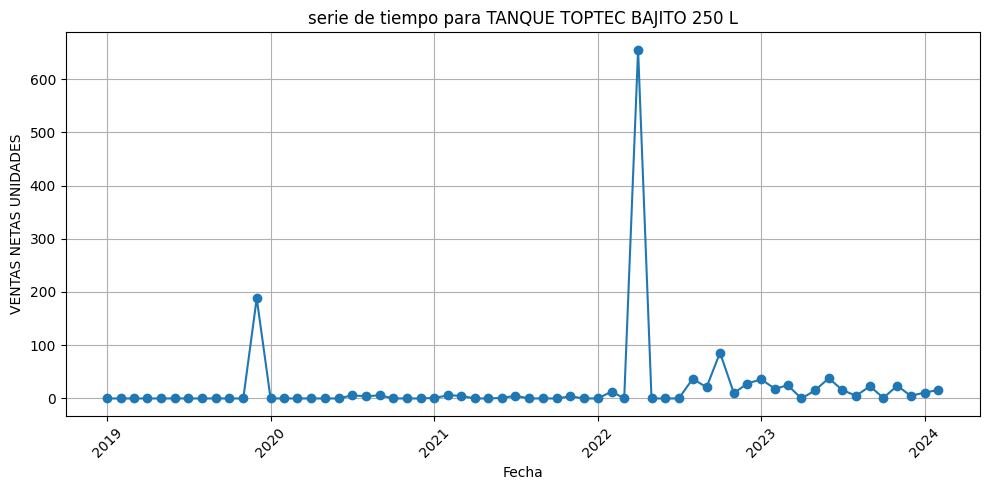

In [ ]:
# Crear un rango de fechas mensual que cubra todo el período de datos
fecha_inicio = ventas_corregido['Fecha'].min().replace(day=1)
fecha_fin = ventas_corregido['Fecha'].max().replace(day=1)
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# Obtener los nombres únicos de los productos
productos = ['KIT JUEGO TANQUE 2000 L','TANQUE TOPTEC 2000 L','KIT JUEGO TANQUE 1000 L','TANQUE TOPTEC 1000 L','KIT JUEGO TANQUE 500 L','TANQUE TOPTEC 500 L','KIT JUEGO TANQUE 250 L','TANQUE TOPTEC 250 L','KIT JUEGO TANQUE BAJITO 500 L','TANQUE TOPTEC BAJITO 500 L','KIT JUEGO TANQUE BAJITO 250 L','TANQUE TOPTEC BAJITO 250 L']

# Graficar la tendencia de ventas mensuales de cada producto con el período completo
for producto in productos:
    # Filtrar los datos de cada producto
    df_producto = ventas_corregido[ventas_corregido['NOMBRE ITEM SAP'] == producto]

    # Agrupar las ventas por mes y llenar los meses faltantes con 0
    df_mensual = df_producto.groupby(pd.Grouper(key='Fecha', freq='MS'))['VENTAS NETAS UNIDADES'].sum().reindex(rango_fechas, fill_value=0).reset_index()
    df_mensual.columns = ['Fecha', 'VENTAS NETAS UNIDADES']

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df_mensual['Fecha'], df_mensual['VENTAS NETAS UNIDADES'], marker='o', linestyle='-')
    plt.title(f'serie de tiempo para {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('VENTAS NETAS UNIDADES')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
    plt.tight_layout()  # Ajustar el diseño
    plt.show()

Como podemos observar en las gráficas se están mostrando exactamente los mismo datos para diferentes productos, así que se unificaremos sus nombres y posteriormente eliminaremos los duplicados

Eliminare todos los tanques

In [ ]:
# Lista de tanques a eliminar
tanques_a_eliminar = [
    'TANQUE TOPTEC 2000 L',
    'TANQUE TOPTEC 1000 L',
    'TANQUE TOPTEC 500 L',
    'TANQUE TOPTEC 250 L',
    'TANQUE TOPTEC BAJITO 500 L',
    'TANQUE TOPTEC BAJITO 250 L'
]

# Filtrar y conservar solo los productos que no están en la lista de tanques a eliminar
ventas_corregido = ventas_corregido[~ventas_corregido['NOMBRE ITEM SAP'].isin(tanques_a_eliminar)]

# Mostrar el resultado para verificar
ventas_corregido.head()


,Fecha,CODIGO SAP,NOMBRE ITEM SAP,BODEGA MOVIMIENTO,CIUDAD,VENTAS NETAS UNIDADES
0,2019-01-08,T1005028451,KIT JUEGO TANQUE 500 L,PRODUCTO TERMINADO,NaN,1
1,2019-01-08,T1005028410,KIT JUEGO TANQUE 1000 L,PRODUCTO TERMINADO,NaN,25
2,2019-01-08,T1005028410,KIT JUEGO TANQUE 1000 L,PRODUCTO TERMINADO,NaN,4
3,2019-01-09,T1005028420,KIT JUEGO TANQUE 2000 L,BOD SATEL TOPTEC BQLLA,NaN,8
4,2019-01-09,T1005028410,KIT JUEGO TANQUE 1000 L,PRODUCTO TERMINADO,NaN,6


In [ ]:
nombres_items = ventas_corregido['NOMBRE ITEM SAP'].value_counts()
nombres_items_df = nombres_items.reset_index()
nombres_items_df.columns = ['Nombre Item', 'Frecuencia']
nombres_items_df.to_csv('nombres_items_corregido_4.csv', index=False)

Análizamos nuevamente los productos

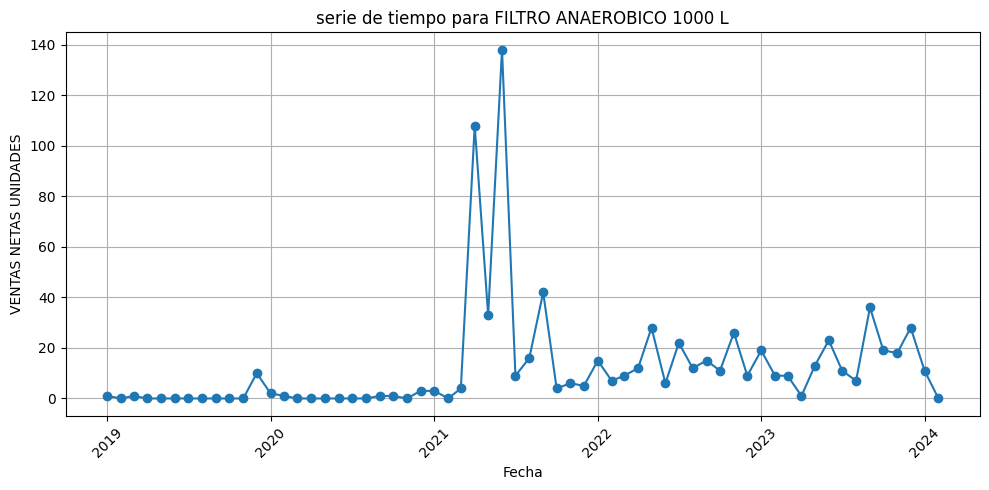

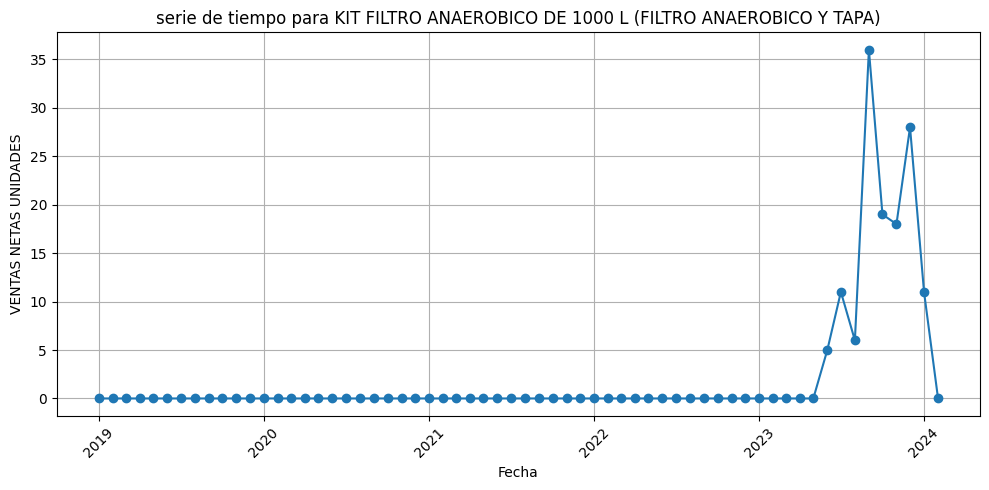

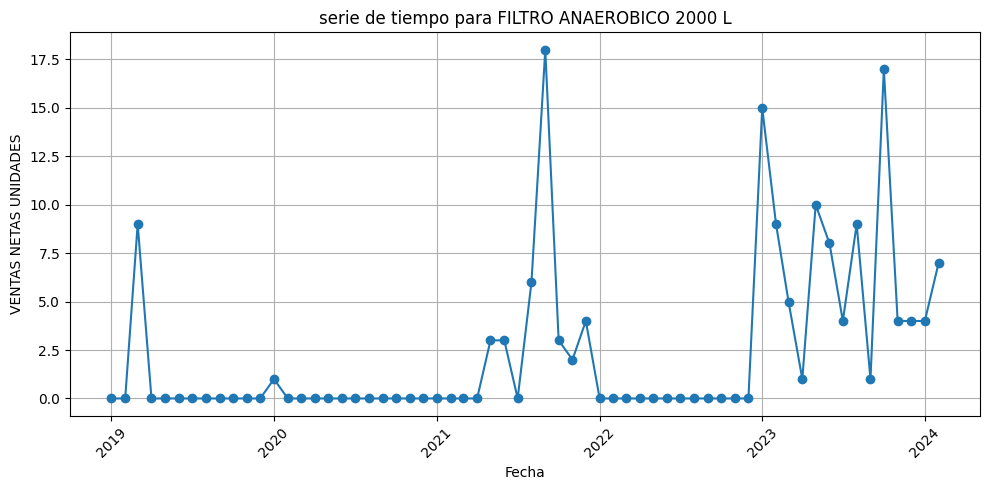

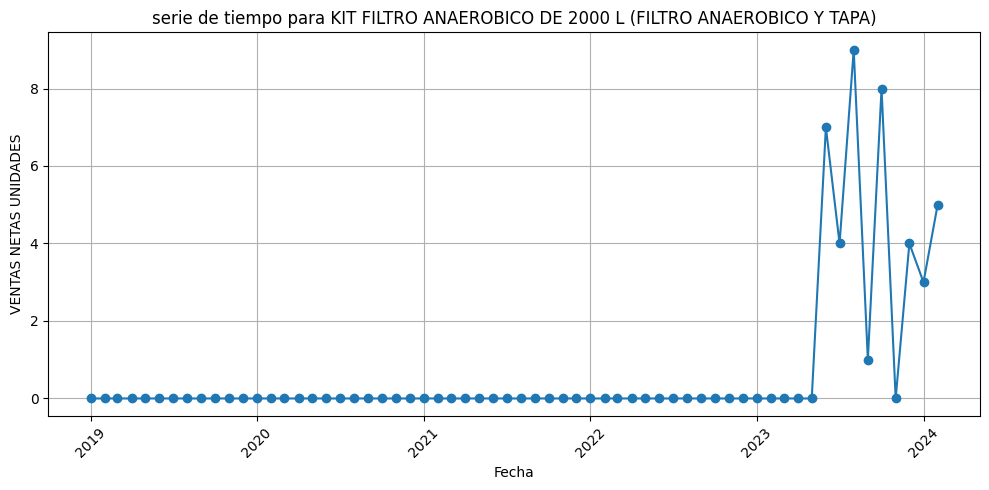

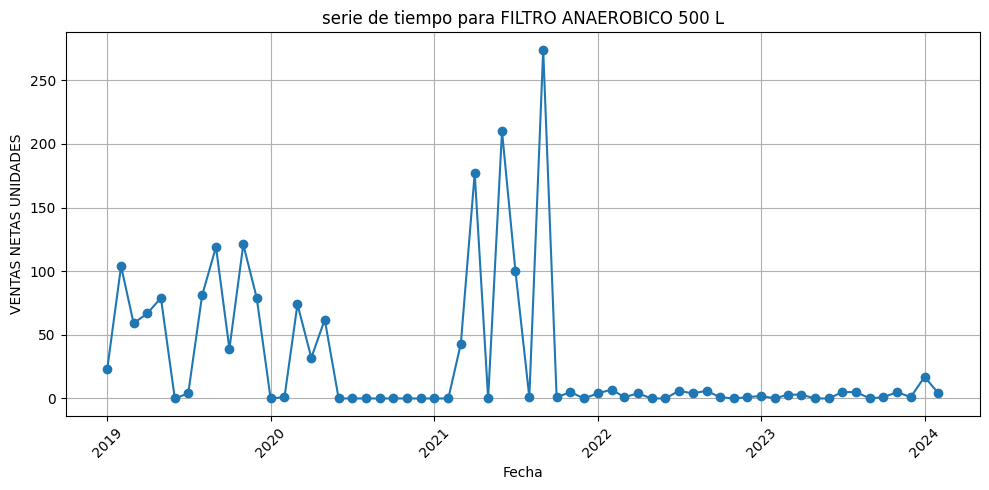

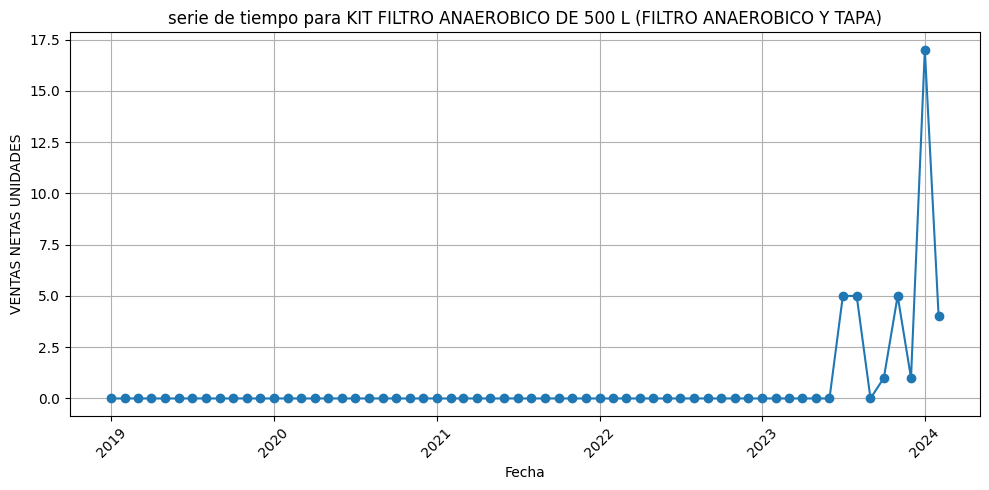

In [ ]:
# Crear un rango de fechas mensual que cubra todo el período de datos
fecha_inicio = ventas_corregido['Fecha'].min().replace(day=1)
fecha_fin = ventas_corregido['Fecha'].max().replace(day=1)
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# Obtener los nombres únicos de los productos
productos = ['FILTRO ANAEROBICO 1000 L','KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)','FILTRO ANAEROBICO 2000 L','KIT FILTRO ANAEROBICO DE 2000 L (FILTRO ANAEROBICO Y TAPA)','FILTRO ANAEROBICO 500 L','KIT FILTRO ANAEROBICO DE 500 L (FILTRO ANAEROBICO Y TAPA)']

# Graficar la tendencia de ventas mensuales de cada producto con el período completo
for producto in productos:
    # Filtrar los datos de cada producto
    df_producto = ventas_corregido[ventas_corregido['NOMBRE ITEM SAP'] == producto]

    # Agrupar las ventas por mes y llenar los meses faltantes con 0
    df_mensual = df_producto.groupby(pd.Grouper(key='Fecha', freq='MS'))['VENTAS NETAS UNIDADES'].sum().reindex(rango_fechas, fill_value=0).reset_index()
    df_mensual.columns = ['Fecha', 'VENTAS NETAS UNIDADES']

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df_mensual['Fecha'], df_mensual['VENTAS NETAS UNIDADES'], marker='o', linestyle='-')
    plt.title(f'serie de tiempo para {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('VENTAS NETAS UNIDADES')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
    plt.tight_layout()  # Ajustar el diseño
    plt.show()

Como podemos observar en las gráficas se están mostrando exactamente los mismo datos para diferentes productos, así que se unificaremos sus nombres y posteriormente eliminaremos los duplicados nuevamente

In [ ]:
ventas_corregido.loc[(ventas_corregido['Fecha'] > '2023-07-17') & ((ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 1000 L') | (ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)'))]

,Fecha,CODIGO SAP,NOMBRE ITEM SAP,BODEGA MOVIMIENTO,CIUDAD,VENTAS NETAS UNIDADES
23319,2023-07-18,T1005009410,FILTRO ANAEROBICO 1000 L,PRODUCTO TERMINADO,LA CEJA,6
23330,2023-07-18,T1005029150,KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...,PRODUCTO TERMINADO,LA CEJA,6
23359,2023-07-19,T1005009410,FILTRO ANAEROBICO 1000 L,PRODUCTO TERMINADO,CHINCHINA,3
23360,2023-07-19,T1005029150,KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...,PRODUCTO TERMINADO,CHINCHINA,3
23509,2023-07-26,T1005029150,KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...,PRODUCTO TERMINADO,MANIZALES,1
...,...,...,...,...,...,...
28251,2024-01-18,T1005009410,FILTRO ANAEROBICO 1000 L,PRODUCTO TERMINADO,LA TEBAIDA,1
28532,2024-01-24,T1005009410,FILTRO ANAEROBICO 1000 L,PRODUCTO TERMINADO,MANIZALES,3
28533,2024-01-24,T1005029150,KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...,PRODUCTO TERMINADO,MANIZALES,3
28586,2024-01-24,T1005029150,KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAERO...,PRODUCTO TERMINADO,CAUCASIA,4


In [ ]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 2000 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 2000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 2000 L (FILTRO ANAEROBICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 2000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 1000 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 1000 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 1000 L (FILTRO ANAEROBICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 1000 L'

ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'FILTRO ANAEROBICO 500 L', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 500 L'
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'] == 'KIT FILTRO ANAEROBICO DE 500 L (FILTRO ANAEROBICO Y TAPA)', 'NOMBRE ITEM SAP'] = 'KIT FILTRO ANAEROBICO 500 L'

In [ ]:
duplicados = ventas_corregido[ventas_corregido.duplicated(keep=False)]
print(duplicados)


           Fecha   CODIGO SAP            NOMBRE ITEM SAP   BODEGA MOVIMIENTO  \
12    2019-01-10  T1005028420    KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
14    2019-01-10  T1005028420    KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
26    2019-01-15  T1005028410    KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   
28    2019-01-15  T1005028410    KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   
43    2019-01-16  T1005028420    KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
...          ...          ...                        ...                 ...   
29758 2024-02-23  T1005027450   TAPA TANQUE TOPTEC 500 L  PRODUCTO TERMINADO   
29806 2024-02-26  T1005027420  TAPA TANQUE TOPTEC 2000 L  PRODUCTO TERMINADO   
29811 2024-02-26  T1005027420  TAPA TANQUE TOPTEC 2000 L  PRODUCTO TERMINADO   
29977 2024-02-29  T1005027450   TAPA TANQUE TOPTEC 500 L  PRODUCTO TERMINADO   
29980 2024-02-29  T1005027450   TAPA TANQUE TOPTEC 500 L  PRODUCTO TERMINADO   

             CIUDAD  VENTAS NETAS UNIDA

En este caso no se están detectando duplicados porque el campo "CODIGO SAP" sí es diferente, aunque claramente vimos arriba que es un registro duplicado, así que omitiremos este campo para dropear los duplicados

In [ ]:
ventas_corregido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21915 entries, 0 to 29981
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  21915 non-null  datetime64[ns]
 1   CODIGO SAP             21878 non-null  object        
 2   NOMBRE ITEM SAP        21915 non-null  object        
 3   BODEGA MOVIMIENTO      21915 non-null  object        
 4   CIUDAD                 12075 non-null  object        
 5   VENTAS NETAS UNIDADES  21915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
# Crear una máscara para filtrar filas donde 'NOMBRE ITEM SAP' contenga "KIT FILTRO ANAEROBICO"
filtro = ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO", case=False, na=False)

# Aplicar drop_duplicates() directamente en el DataFrame original utilizando .loc y excluyendo 'CODIGO SAP'
ventas_corregido.loc[filtro] = ventas_corregido.loc[filtro].drop_duplicates(subset=ventas_corregido.columns.difference(['CODIGO SAP']))


In [ ]:
ventas_corregido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21915 entries, 0 to 29981
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  21817 non-null  datetime64[ns]
 1   CODIGO SAP             21780 non-null  object        
 2   NOMBRE ITEM SAP        21817 non-null  object        
 3   BODEGA MOVIMIENTO      21817 non-null  object        
 4   CIUDAD                 11991 non-null  object        
 5   VENTAS NETAS UNIDADES  21817 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
ventas_corregido.loc[ventas_corregido['NOMBRE ITEM SAP'].str.contains("KIT FILTRO ANAEROBICO", case=False, na=False)]

,Fecha,CODIGO SAP,NOMBRE ITEM SAP,BODEGA MOVIMIENTO,CIUDAD,VENTAS NETAS UNIDADES
42,2019-01-16,T1005009410,KIT FILTRO ANAEROBICO 1000 L,PRODUCTO TERMINADO,NaN,1.0
170,2019-01-31,T1005009950,KIT FILTRO ANAEROBICO 500 L,PRODUCTO TERMINADO,NaN,10.0
175,2019-01-31,T1005009950,KIT FILTRO ANAEROBICO 500 L,PRODUCTO TERMINADO,NaN,13.0
204,2019-02-05,T1005009950,KIT FILTRO ANAEROBICO 500 L,PRODUCTO TERMINADO,NaN,13.0
215,2019-02-07,T1005009950,KIT FILTRO ANAEROBICO 500 L,PRODUCTO TERMINADO,NaN,14.0
...,...,...,...,...,...,...
29523,2024-02-19,T1005029149,KIT FILTRO ANAEROBICO 500 L,PRODUCTO TERMINADO,LA CEJA,3.0
29531,2024-02-19,T1005009950,KIT FILTRO ANAEROBICO 500 L,PRODUCTO TERMINADO,MEDELLIN,1.0
29605,2024-02-20,T1005029148,KIT FILTRO ANAEROBICO 2000 L,PRODUCTO TERMINADO,CISNEROS,3.0
29756,2024-02-23,T1005009920,KIT FILTRO ANAEROBICO 2000 L,PRODUCTO TERMINADO,MANIZALES,1.0


In [ ]:
duplicados = ventas_corregido[ventas_corregido.duplicated(subset=ventas_corregido.columns.difference(['CODIGO SAP']), keep=False)]
print(duplicados)


           Fecha   CODIGO SAP           NOMBRE ITEM SAP   BODEGA MOVIMIENTO  \
12    2019-01-10  T1005028420   KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
14    2019-01-10  T1005028420   KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
26    2019-01-15  T1005028410   KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   
28    2019-01-15  T1005028410   KIT JUEGO TANQUE 1000 L  PRODUCTO TERMINADO   
43    2019-01-16  T1005028420   KIT JUEGO TANQUE 2000 L  PRODUCTO TERMINADO   
...          ...          ...                       ...                 ...   
29813        NaT          NaN                       NaN                 NaN   
29963 2024-02-29  T1005035451    KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
29976 2024-02-29  T1005032451    KIT JUEGO TANQUE 500 L  PRODUCTO TERMINADO   
29977 2024-02-29  T1005027450  TAPA TANQUE TOPTEC 500 L  PRODUCTO TERMINADO   
29980 2024-02-29  T1005027450  TAPA TANQUE TOPTEC 500 L  PRODUCTO TERMINADO   

             CIUDAD  VENTAS NETAS UNIDADES  
12    

In [ ]:
# Lista de productos específicos extraídos de la imagen
productos_especificos = [
    'KIT JUEGO TANQUE 1000 L',
    'KIT JUEGO TANQUE 500 L',
    'KIT JUEGO TANQUE 2000 L',
    'KIT JUEGO TANQUE 250 L',
    'KIT JUEGO TANQUE BAJITO 250 L',
    'TANQUE BEBEDERO 500 L',
    'TANQUE BEBEDERO 250 L',
    'CRUCETA DISTRIBUCION 500 L',
    'KIT FILTRO ANAEROBICO 500 L',
    'KIT FILTRO ANAEROBICO 1000 L',
    'KIT JUEGO TANQUE BAJITO 500 L',
    'KIT SEPTICO DE 1000 L (TANQUE SEPTICO Y TAPA)',
    'KIT TRAMPA DE GRASAS DE 250 L (TRAMPA DE GRASAS Y TAPA)',
    'KIT FILTRO ANAEROBICO 2000 L',
    'CRUCETA DISTRIBUCION 2000 L',
    'KIT SEPTICO DE 2000 L (TANQUE SEPTICO Y TAPA)',
    'KIT SEPTICO DE 500 L (TANQUE SEPTICO Y TAPA)',
    'KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L'
]

In [ ]:
# Filtrar el DataFrame original para incluir solo los productos específicos
ventas_filtradas = ventas_corregido[ventas_corregido['NOMBRE ITEM SAP'].isin(productos_especificos)]

# Crear pivot_table con productos específicos
pivot_data_especificos = ventas_filtradas.pivot_table(
    index='Fecha',  # Filas por fecha
    columns='NOMBRE ITEM SAP',  # Columnas por productos
    values='VENTAS NETAS UNIDADES',  # Valores de ventas
    aggfunc='sum'  # Sumar las ventas en caso de duplicados
)

# Reemplazar NaN por 0
pivot_data_especificos = pivot_data_especificos.fillna(0)

# Restablecer índice para que 'Fecha' sea una columna
pivot_data_especificos = pivot_data_especificos.reset_index()

# Mostrar los resultados
print("Pivot table con productos específicos:")
print(pivot_data_especificos.head())


Pivot table con productos específicos:
NOMBRE ITEM SAP      Fecha  CRUCETA DISTRIBUCION 2000 L  \
0               2019-01-08                          0.0   
1               2019-01-09                          0.0   
2               2019-01-10                          0.0   
3               2019-01-11                          0.0   
4               2019-01-14                          0.0   

NOMBRE ITEM SAP  CRUCETA DISTRIBUCION 500 L  KIT FILTRO ANAEROBICO 1000 L  \
0                                       0.0                           0.0   
1                                       0.0                           0.0   
2                                       0.0                           0.0   
3                                       0.0                           0.0   
4                                       0.0                           0.0   

NOMBRE ITEM SAP  KIT FILTRO ANAEROBICO 2000 L  KIT FILTRO ANAEROBICO 500 L  \
0                                         0.0                    

In [ ]:
pivot_data_especificos.head()

NOMBRE ITEM SAP,Fecha,CRUCETA DISTRIBUCION 2000 L,CRUCETA DISTRIBUCION 500 L,KIT FILTRO ANAEROBICO 1000 L,KIT FILTRO ANAEROBICO 2000 L,KIT FILTRO ANAEROBICO 500 L,KIT JUEGO TANQUE 1000 L,KIT JUEGO TANQUE 2000 L,KIT JUEGO TANQUE 250 L,KIT JUEGO TANQUE 500 L,KIT JUEGO TANQUE BAJITO 250 L,KIT JUEGO TANQUE BAJITO 500 L,KIT JUEGO TANQUE TOPTEC BOTELLA 1100 L,KIT SEPTICO DE 1000 L (TANQUE SEPTICO Y TAPA),KIT SEPTICO DE 2000 L (TANQUE SEPTICO Y TAPA),KIT SEPTICO DE 500 L (TANQUE SEPTICO Y TAPA),KIT TRAMPA DE GRASAS DE 250 L (TRAMPA DE GRASAS Y TAPA),TANQUE BEBEDERO 250 L,TANQUE BEBEDERO 500 L
0,2019-01-08,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-09,0.0,0.0,0.0,0.0,0.0,27.0,18.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-10,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-11,0.0,0.0,0.0,0.0,0.0,10.0,0.0,25.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-14,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot_data_especificos.to_csv('pivot_data_especificos.csv', index=False)

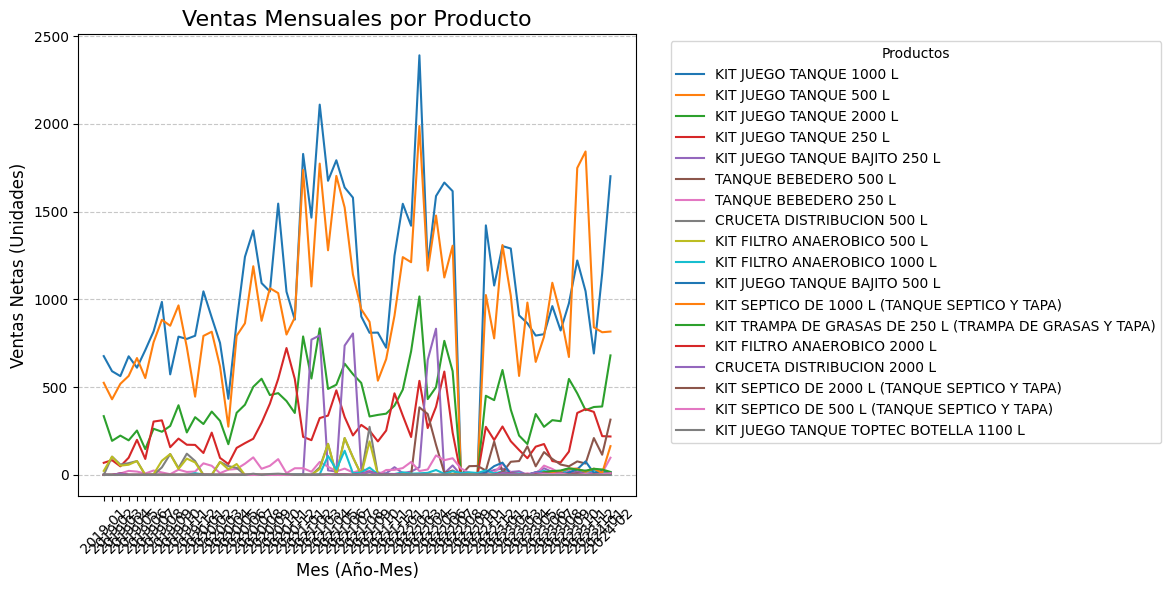

In [ ]:
# Asegurarte de que 'Fecha' sea de tipo datetime
pivot_data_especificos['Fecha'] = pd.to_datetime(pivot_data_especificos['Fecha'])

# Crear una nueva columna con el mes (Año-Mes) en formato de texto para agrupar
pivot_data_especificos['Mes'] = pivot_data_especificos['Fecha'].dt.to_period('M')

# Agrupar por mes y sumar las ventas de cada producto
ventas_mensuales = pivot_data_especificos.groupby('Mes').sum(numeric_only=True)

# Convertir el índice de periodos a strings para la gráfica
ventas_mensuales.index = ventas_mensuales.index.astype(str)

# Graficar los datos
plt.figure(figsize=(12, 6))

# Crear un gráfico de líneas para cada producto
for producto in productos_especificos:
    if producto in ventas_mensuales.columns:
        plt.plot(ventas_mensuales.index, ventas_mensuales[producto], label=producto)

# Personalización del gráfico
plt.title("Ventas Mensuales por Producto", fontsize=16)
plt.xlabel("Mes (Año-Mes)", fontsize=12)
plt.ylabel("Ventas Netas (Unidades)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Productos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()